# Sommaire

* [Introduction](#introduction)
* [I) Importation des données](#i)
* [II) Nettoyage du jeu de données](#ii)
    * [1) Description du jeu de données](#ii1)
    * [2) Un peu de ménage](#ii2)
        * [i) Country Code](#ii2i)
        * [ii) Indicateurs](#ii2ii)
    * [3) Jointure](#ii3)
    * [4) Nettoyage du jeu de données](#ii4)
* [III) Pré-analyse des données](#iii)
    * [1) Par région](#iii1)
    * [2) Par niveau de revenu](#iii2)
    * [3) Par pays](#iii3)
* [Conclusion](#conclusion)

# Introduction <a class="anchor" id="introduction"></a>
Dans ce notebook, nous allons faire une analyse pré-exploratoire des données sur l'éducation de la banque mondiale afin de juger si elles permettent d'informer le projet d'expansion à l'international de l'entreprise **academy**.

# I) Importation des données <a class="anchor" id="i"></a>

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
raw_country = pd.read_csv('EdStatsCountry.csv')
raw_country

Country Code    Short Name    Table Name                     Long Name  \
0            ABW         Aruba         Aruba                         Aruba   
1            AFG   Afghanistan   Afghanistan  Islamic State of Afghanistan   
2            AGO        Angola        Angola   People's Republic of Angola   
3            ALB       Albania       Albania           Republic of Albania   
4            AND       Andorra       Andorra       Principality of Andorra   
..           ...           ...           ...                           ...   
236          XKX        Kosovo        Kosovo            Republic of Kosovo   
237          YEM         Yemen   Yemen, Rep.             Republic of Yemen   
238          ZAF  South Africa  South Africa      Republic of South Africa   
239          ZMB        Zambia        Zambia            Republic of Zambia   
240          ZWE      Zimbabwe      Zimbabwe          Republic of Zimbabwe   

    2-alpha code       Currency Unit  \
0             AW       Aruban florin   
1             AF      Afghan afghani   
2             AO      Angolan kwanza   
3             AL        Albanian lek   
4             AD                Euro   
..           ...                 ...   
236          NaN                Euro   
237           YE         Yemeni rial   
238           ZA  South African rand   
239           ZM  New Zambian kwacha   
240           ZW         U.S. dollar   

                                         Special Notes  \
0    SNA data for 2000-2011 are updated from offici...   
1    Fiscal year end: March 20; reporting period fo...   
2    April 2013 database update: Based on IMF data,...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
236  Kosovo became a World Bank member on June 29, ...   
237  Based on official government statistics and In...   
238  Fiscal year end: March 31; reporting period fo...   
239  National accounts data have rebased to reflect...   
240  Fiscal year end: June 30; reporting period for...   

                         Region          Income Group WB-2 code  ...  \
0     Latin America & Caribbean  High income: nonOECD        AW  ...   
1                    South Asia            Low income        AF  ...   
2            Sub-Saharan Africa   Upper middle income        AO  ...   
3         Europe & Central Asia   Upper middle income        AL  ...   
4         Europe & Central Asia  High income: nonOECD        AD  ...   
..                          ...                   ...       ...  ...   
236       Europe & Central Asia   Lower middle income        KV  ...   
237  Middle East & North Africa   Lower middle income        RY  ...   
238          Sub-Saharan Africa   Upper middle income        ZA  ...   
239          Sub-Saharan Africa   Lower middle income        ZM  ...   
240          Sub-Saharan Africa            Low income        ZW  ...   

                IMF data dissemination standard  \
0                                           NaN   
1      General Data Dissemination System (GDDS)   
2      General Data Dissemination System (GDDS)   
3      General Data Dissemination System (GDDS)   
4                                           NaN   
..                                          ...   
236    General Data Dissemination System (GDDS)   
237    General Data Dissemination System (GDDS)   
238  Special Data Dissemination Standard (SDDS)   
239    General Data Dissemination System (GDDS)   
240    General Data Dissemination System (GDDS)   

                              Latest population census  \
0                                                 2010   
1                                                 1979   
2                                                 1970   
3                                                 2011   
4    2011. Population figures compiled from adminis...   
..                                                 ...   
236  

In [6]:
raw_series = pd.read_csv('EdStatsSeries.csv')
raw_series

Series Code         Topic  \
0             BAR.NOED.1519.FE.ZS    Attainment   
1                BAR.NOED.1519.ZS    Attainment   
2             BAR.NOED.15UP.FE.ZS    Attainment   
3                BAR.NOED.15UP.ZS    Attainment   
4             BAR.NOED.2024.FE.ZS    Attainment   
...                           ...           ...   
3660    UIS.XUNIT.USCONST.3.FSGOV  Expenditures   
3661    UIS.XUNIT.USCONST.4.FSGOV  Expenditures   
3662   UIS.XUNIT.USCONST.56.FSGOV  Expenditures   
3663  XGDP.23.FSGOV.FDINSTADM.FFD  Expenditures   
3664  XGDP.56.FSGOV.FDINSTADM.FFD  Expenditures   

                                         Indicator Name  \
0     Barro-Lee: Percentage of female population age...   
1     Barro-Lee: Percentage of population age 15-19 ...   
2     Barro-Lee: Percentage of female population age...   
3     Barro-Lee: Percentage of population age 15+ wi...   
4     Barro-Lee: Percentage of female population age...   
...                                                 ...   
3660  Government expenditure per upper secondary stu...   
3661  Government expenditure per post-secondary non-...   
3662  Government expenditure per tertiary student (c...   
3663  Government expenditure in secondary institutio...   
3664  Government expenditure in tertiary institution...   

                                       Short definition  \
0     Percentage of female population age 15-19 with...   
1     Percentage of population age 15-19 with no edu...   
2     Percentage of female population age 15+ with n...   
3     Percentage of population age 15+ with no educa...   
4     Percentage of female population age 20-24 with...   
...                                                 ...   
3660                                                NaN   
3661                                                NaN   
3662                                                NaN   
3663  Total general (local, regional and central) go...   
3664  Total general (local, regional and central) go...   

                                        Long definition  Unit of measure  \
0     Percentage of female population age 15-19 with...              NaN   
1     Percentage of population age 15-19 with no edu...              NaN   
2     Percentage of female population age 15+ with n...              NaN   
3     Percentage of population age 15+ with no educa...              NaN   
4     Percentage of female population age 20-24 with...              NaN   
...                                                 ...              ...   
3660  Average total (current, capital and transfers)...              NaN   
3661  Average total (current, capital and transfers)...              NaN   
3662  Average total (current, capital and transfers)...              NaN   
3663  Total general (local, regional and central) go...              NaN   
3664  Total general (local, regional and central) go...              NaN   

     Periodicity Base Period Other notes Aggregation method  ...  \
0            NaN         NaN         NaN                NaN  ...   
1            NaN         NaN         NaN                NaN  ...   
2            NaN         NaN         NaN                NaN  ...   
3            NaN         NaN         NaN                NaN  ...   
4            NaN         NaN         NaN                NaN  ...   
...          ...         ...         ...                ...  ...   
3660         NaN         NaN         NaN                NaN  ...   
3661         NaN         NaN         NaN                NaN  ...   
3662         NaN         NaN         NaN                NaN  ...   
3663         NaN         NaN   Secondary                NaN  ...   
3664         NaN         NaN    Tertiary                NaN  ...   

     Notes from original source  General comments  \
0                           NaN               NaN   
1                           NaN               NaN   
2                           NaN               NaN   
3                           NaN               NaN

In [7]:
raw_data = pd.read_csv('EdStatsData.csv')
raw_data

Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
4        Arab World          ARB   
...             ...          ...   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, ...   
1       Adjusted net enrolment rate, lower secondary, ...   
2       Adjusted net enrolment rate, lower secondary, ...   
3       Adjusted net enrolment rate, lower secondary, ...   
4       Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 years, b...   
886927  Youth literacy rate, population 15-24 years, f...   
886928  Youth literacy rate, population 15-24 years, g...   
886929  Youth literacy rate, population 15-24 years, m...   

              Indicator Code       1970       1971       1972       1973  \
0                 UIS.NERA.2        NaN        NaN        NaN        NaN   
1               UIS.NERA.2.F        NaN        NaN        NaN        NaN   
2             UIS.NERA.2.GPI        NaN        NaN        NaN        NaN   
3               UIS.NERA.2.M        NaN        NaN        NaN        NaN   
4                SE.PRM.TENR  54.822121  54.894138  56.209438  57.267109   
...                      ...        ...        ...        ...        ...   
886925      UIS.LP.AG15T24.M        NaN        NaN        NaN        NaN   
886926     SE.ADT.1524.LT.ZS        NaN        NaN        NaN        NaN   
886927  SE.ADT.1524.LT.FE.ZS        NaN        NaN        NaN        NaN   
886928  SE.ADT.1524.LT.FM.ZS        NaN        NaN        NaN        NaN   
886929  SE.ADT.1524.LT.MA.ZS        NaN        NaN        NaN        NaN   

             1974      1975  ...  2060  2065  2070  2075  2080  2085  2090  \
0             NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1             NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2             NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3             NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4       57.991138  59.36554  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...           ...       ...  ...   ...   ...   ...   ...   ...   ...   ...   
886925        NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
886926        NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
886927        NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
886928        NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
886929        NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

        2095  2100  Unnamed: 69  
0        NaN   NaN          NaN  
1        NaN   NaN          NaN  
2        NaN   NaN          NaN  
3        NaN   NaN          NaN  
4        NaN   NaN          NaN  
...      ...   ...          ...  
886925   NaN   NaN          NaN  
886926   NaN   NaN          NaN  
886927   NaN   NaN          NaN  
886928   NaN   NaN          NaN  
886929   NaN   NaN          NaN  

[886930 rows x 70 columns]

# II) Nettoyage du jeu de données <a class="anchor" id="ii"></a>
## 1) Description du jeu de données <a class="anchor" id="ii1"></a>

In [8]:
raw_data.shape

(886930, 70)

In [9]:
#Structure globale du dataframe
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [10]:
#Recherche de doublons
raw_data.loc[raw_data.duplicated(subset=['Country Code','Indicator Code'], keep=False)]

Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Indicator Code, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100, Unnamed: 69]
Index: []

[0 rows x 70 columns]

In [11]:
raw_series['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

**Premier constat :**

Beaucoup de colonnes inutiles et énormément de valeurs manquantes. Chronologiquement les données vont de 1970 à 2100.

Il en va de même pour les lignes, de nombreux topics et codes n'ont pas trop de rapport avec l'étude.

On remarque également qu'il existe certains regroupements de pays dans la colonne *Country Name* de la table *data*. On va regarder ça de plus près.

En revanche, pas de doublons a priori.

On va faire un premier ménage en isolant les pays, variables, indicateurs et années qui semblent les plus pertinents avant de poursuivre.

## 2) Un peu de ménage <a class="anchor" id="ii2"></a>
### i) Country Code <a class="anchor" id="ii2i"></a>

In [12]:
#On commence par regarder les pays de la table data
raw_data['Country Name'].unique()[:30]

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra'], dtype=object)

Comme relevé plus haut, les 25 premiers "pays" sont en fait des regroupements de pays soit par zone géographique soit par niveau de revenus. La "vraie" liste des pays commence avec l'Afghanistan. Je choisis de ne pas les conserver, car cela ferait double emploi avec les colonnes *Region* et *Income Group* de la table *country* que nous allons retenir.

In [13]:
#A partir d'ici on travaille avec les codes pays plutôt, car on fera la même chose plus tard dans la table country
#On enregistre une liste des pays à drop
liste_groupes_pays = raw_data['Country Code'].unique()[:25].tolist()
liste_groupes_pays

['ARB',
 'EAS',
 'EAP',
 'EMU',
 'ECS',
 'ECA',
 'EUU',
 'HPC',
 'HIC',
 'LCN',
 'LAC',
 'LDC',
 'LMY',
 'LIC',
 'LMC',
 'MEA',
 'MNA',
 'MIC',
 'NAC',
 'OED',
 'SAS',
 'SSF',
 'SSA',
 'UMC',
 'WLD']

In [14]:
#C'est rassurant, WLD correspond bien à World, donc on a le même nombre de pays que de codes
#(On s'en doutait, car comme on l'a vu avant, il n'y a de valeurs manquantes dans aucune de ces 2 colonnes)
#On regarde à combien de lignes de notre dataframe source ça correspond
raw_data.loc[raw_data['Country Code'].isin(liste_groupes_pays)]

Country Name Country Code  \
0       Arab World          ARB   
1       Arab World          ARB   
2       Arab World          ARB   
3       Arab World          ARB   
4       Arab World          ARB   
...            ...          ...   
91620        World          WLD   
91621        World          WLD   
91622        World          WLD   
91623        World          WLD   
91624        World          WLD   

                                          Indicator Name  \
0      Adjusted net enrolment rate, lower secondary, ...   
1      Adjusted net enrolment rate, lower secondary, ...   
2      Adjusted net enrolment rate, lower secondary, ...   
3      Adjusted net enrolment rate, lower secondary, ...   
4      Adjusted net enrolment rate, primary, both sex...   
...                                                  ...   
91620  Youth illiterate population, 15-24 years, male...   
91621  Youth literacy rate, population 15-24 years, b...   
91622  Youth literacy rate, population 15-24 years, f...   
91623  Youth literacy rate, population 15-24 years, g...   
91624  Youth literacy rate, population 15-24 years, m...   

             Indicator Code       1970       1971       1972       1973  \
0                UIS.NERA.2        NaN        NaN        NaN        NaN   
1              UIS.NERA.2.F        NaN        NaN        NaN        NaN   
2            UIS.NERA.2.GPI        NaN        NaN        NaN        NaN   
3              UIS.NERA.2.M        NaN        NaN        NaN        NaN   
4               SE.PRM.TENR  54.822121  54.894138  56.209438  57.267109   
...                     ...        ...        ...        ...        ...   
91620      UIS.LP.AG15T24.M        NaN        NaN        NaN        NaN   
91621     SE.ADT.1524.LT.ZS        NaN        NaN        NaN        NaN   
91622  SE.ADT.1524.LT.FE.ZS        NaN        NaN        NaN        NaN   
91623  SE.ADT.1524.LT.FM.ZS        NaN        NaN        NaN        NaN   
91624  SE.ADT.1524.LT.MA.ZS        NaN        NaN        NaN        NaN   

            1974      1975  ...  2060  2065  2070  2075  2080  2085  2090  \
0            NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1            NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2            NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3            NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4      57.991138  59.36554  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...          ...       ...  ...   ...   ...   ...   ...   ...   ...   ...   
91620        NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91621        NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91622        NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91623        NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91624        NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       2095  2100  Unnamed: 69  
0       NaN   NaN          NaN  
1       NaN   NaN          NaN  
2       NaN   NaN          NaN  
3       NaN   NaN          NaN  
4       NaN   NaN          NaN  
...     ...   ...          ...  
91620   NaN   NaN          NaN  
91621   NaN   NaN          NaN  
91622   NaN   NaN          NaN  
91623   NaN   NaN          NaN  
91624   NaN   NaN          NaN  

[91625 rows x 70 columns]

In [15]:
#On retire
data_drop_countries = raw_data.loc[~raw_data['Country Code'].isin(liste_groupes_pays)].reset_index(drop=True)
data_drop_countries

Country Name Country Code  \
0       Afghanistan          AFG   
1       Afghanistan          AFG   
2       Afghanistan          AFG   
3       Afghanistan          AFG   
4       Afghanistan          AFG   
...             ...          ...   
795300     Zimbabwe          ZWE   
795301     Zimbabwe          ZWE   
795302     Zimbabwe          ZWE   
795303     Zimbabwe          ZWE   
795304     Zimbabwe          ZWE   

                                           Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, ...   
1       Adjusted net enrolment rate, lower secondary, ...   
2       Adjusted net enrolment rate, lower secondary, ...   
3       Adjusted net enrolment rate, lower secondary, ...   
4       Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
795300  Youth illiterate population, 15-24 years, male...   
795301  Youth literacy rate, population 15-24 years, b...   
795302  Youth literacy rate, population 15-24 years, f...   
795303  Youth literacy rate, population 15-24 years, g...   
795304  Youth literacy rate, population 15-24 years, m...   

              Indicator Code  1970  1971  1972  1973      1974  1975  ...  \
0                 UIS.NERA.2   NaN   NaN   NaN   NaN   7.05911   NaN  ...   
1               UIS.NERA.2.F   NaN   NaN   NaN   NaN   2.53138   NaN  ...   
2             UIS.NERA.2.GPI   NaN   NaN   NaN   NaN   0.22154   NaN  ...   
3               UIS.NERA.2.M   NaN   NaN   NaN   NaN  11.42652   NaN  ...   
4                SE.PRM.TENR   NaN   NaN   NaN   NaN       NaN   NaN  ...   
...                      ...   ...   ...   ...   ...       ...   ...  ...   
795300      UIS.LP.AG15T24.M   NaN   NaN   NaN   NaN       NaN   NaN  ...   
795301     SE.ADT.1524.LT.ZS   NaN   NaN   NaN   NaN       NaN   NaN  ...   
795302  SE.ADT.1524.LT.FE.ZS   NaN   NaN   NaN   NaN       NaN   NaN  ...   
795303  SE.ADT.1524.LT.FM.ZS   NaN   NaN   NaN   NaN       NaN   NaN  ...   
795304  SE.ADT.1524.LT.MA.ZS   NaN   NaN   NaN   NaN       NaN   NaN  ...   

        2060  2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
3        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
4        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
...      ...   ...   ...   ...   ...   ...   ...   ...   ...          ...  
795300   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
795301   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
795302   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
795303   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
795304   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[795305 rows x 70 columns]

In [16]:
#Juste par curiosité avant de passer à la suite
data_drop_countries['Country Code'].nunique()

217

In [17]:
#Même manoeuvre dans la table country
raw_country.loc[raw_country['Country Code'].isin(liste_groupes_pays)]

Country Code                                      Short Name  \
5            ARB                                      Arab World   
57           EAP           East Asia & Pacific (developing only)   
58           EAS         East Asia & Pacific (all income levels)   
59           ECA         Europe & Central Asia (developing only)   
60           ECS       Europe & Central Asia (all income levels)   
63           EMU                                       Euro area   
68           EUU                                  European Union   
89           HIC                                     High income   
92           HPC          Heavily indebted poor countries (HIPC)   
116          LAC     Latin America & Caribbean (developing only)   
122          LCN   Latin America & Caribbean (all income levels)   
123          LDC    Least developed countries: UN classification   
124          LIC                                      Low income   
127          LMC                             Lower middle income   
128          LMY                             Low & middle income   
140          MEA  Middle East & North Africa (all income levels)   
143          MIC                                   Middle income   
148          MNA    Middle East & North Africa (developing only)   
157          NAC                                   North America   
168          OED                                    OECD members   
187          SAS                                      South Asia   
198          SSA            Sub-Saharan Africa (developing only)   
200          SSF          Sub-Saharan Africa (all income levels)   
225          UMC                             Upper middle income   
234          WLD                                           World   

                                         Table Name  \
5                                        Arab World   
57                              East Asia & Pacific   
58          East Asia & Pacific (all income levels)   
59                            Europe & Central Asia   
60        Europe & Central Asia (all income levels)   
63                                        Euro area   
68                                   European Union   
89                                      High income   
92           Heavily indebted poor countries (HIPC)   
116                       Latin America & Caribbean   
122   Latin America & Caribbean (all income levels)   
123    Least developed countries: UN classification   
124                                      Low income   
127                             Lower middle income   
128                             Low & middle income   
140  Middle East & North Africa (all income levels)   
143                                   Middle income   
148                      Middle East & North Africa   
157                                   North America   
168                                    OECD members   
187                                      South Asia   
198                              Sub-Saharan Africa   
200          Sub-Saharan Africa (all income levels)   
225                             Upper middle income   
234                                           World   

                                          Long Name 2-alpha code  \
5                                        Arab World           1A   
57            East Asia & Pacific (developing only)           4E   
58          East Asia & Pacific (all income levels)           Z4   
59          Europe & Central Asia (developing only)           7E   
60        Europe & Central Asia (all income levels)           Z7   
63                                        Euro area           XC   
68                                   European Union           EU   
89                                      High income           XD   
92           Heavily indebted poor countries (HIPC)           XE   
116     Latin America & Caribbean (developing only)           XJ   
122   Latin America & Caribbean (all income levels)     

In [18]:
#Les mêmes 25 "pays" sont bien présents dans cette table, on a bien fait de vérifier
#Et on a également bien fait d'utiliser le code pays, car il y a quelques divergences au niveau des noms de pays
#Comme avant, on retire
country_drop_countries = raw_country.loc[~raw_country['Country Code'].isin(liste_groupes_pays)].reset_index(drop=True)
country_drop_countries

Country Code    Short Name    Table Name                     Long Name  \
0            ABW         Aruba         Aruba                         Aruba   
1            AFG   Afghanistan   Afghanistan  Islamic State of Afghanistan   
2            AGO        Angola        Angola   People's Republic of Angola   
3            ALB       Albania       Albania           Republic of Albania   
4            AND       Andorra       Andorra       Principality of Andorra   
..           ...           ...           ...                           ...   
211          XKX        Kosovo        Kosovo            Republic of Kosovo   
212          YEM         Yemen   Yemen, Rep.             Republic of Yemen   
213          ZAF  South Africa  South Africa      Republic of South Africa   
214          ZMB        Zambia        Zambia            Republic of Zambia   
215          ZWE      Zimbabwe      Zimbabwe          Republic of Zimbabwe   

    2-alpha code       Currency Unit  \
0             AW       Aruban florin   
1             AF      Afghan afghani   
2             AO      Angolan kwanza   
3             AL        Albanian lek   
4             AD                Euro   
..           ...                 ...   
211          NaN                Euro   
212           YE         Yemeni rial   
213           ZA  South African rand   
214           ZM  New Zambian kwacha   
215           ZW         U.S. dollar   

                                         Special Notes  \
0    SNA data for 2000-2011 are updated from offici...   
1    Fiscal year end: March 20; reporting period fo...   
2    April 2013 database update: Based on IMF data,...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
211  Kosovo became a World Bank member on June 29, ...   
212  Based on official government statistics and In...   
213  Fiscal year end: March 31; reporting period fo...   
214  National accounts data have rebased to reflect...   
215  Fiscal year end: June 30; reporting period for...   

                         Region          Income Group WB-2 code  ...  \
0     Latin America & Caribbean  High income: nonOECD        AW  ...   
1                    South Asia            Low income        AF  ...   
2            Sub-Saharan Africa   Upper middle income        AO  ...   
3         Europe & Central Asia   Upper middle income        AL  ...   
4         Europe & Central Asia  High income: nonOECD        AD  ...   
..                          ...                   ...       ...  ...   
211       Europe & Central Asia   Lower middle income        KV  ...   
212  Middle East & North Africa   Lower middle income        RY  ...   
213          Sub-Saharan Africa   Upper middle income        ZA  ...   
214          Sub-Saharan Africa   Lower middle income        ZM  ...   
215          Sub-Saharan Africa            Low income        ZW  ...   

                IMF data dissemination standard  \
0                                           NaN   
1      General Data Dissemination System (GDDS)   
2      General Data Dissemination System (GDDS)   
3      General Data Dissemination System (GDDS)   
4                                           NaN   
..                                          ...   
211    General Data Dissemination System (GDDS)   
212    General Data Dissemination System (GDDS)   
213  Special Data Dissemination Standard (SDDS)   
214    General Data Dissemination System (GDDS)   
215    General Data Dissemination System (GDDS)   

                              Latest population census  \
0                                                 2010   
1                                                 1979   
2                                                 1970   
3                                                 2011   
4    2011. Population figures compiled from adminis...   
..                                                 ...   
211  

In [19]:
#On note qu'il existe 217 pays uniques dans la table data et 216 dans la table country
#On prend un peu d'avance avant d'effecuer la jointure entre les 2 tables pour voir si ça risque d'être problématique
#On effectue une jointure entre les 2 colonnes concernées avec indicateur pour voir où sont les divergences
country_join = pd.merge(country_drop_countries['Country Code'], data_drop_countries['Country Code'],
                   on='Country Code', how='outer', indicator=True)
country_join

Country Code      _merge
0               ABW        both
1               ABW        both
2               ABW        both
3               ABW        both
4               ABW        both
...             ...         ...
795300          VGB  right_only
795301          VGB  right_only
795302          VGB  right_only
795303          VGB  right_only
795304          VGB  right_only

[795305 rows x 2 columns]

In [20]:
#On compte le nombre de right_only et left_only uniques
country_join[country_join['_merge'] == 'left_only']['Country Code'].nunique()

0

In [21]:
country_join[country_join['_merge'] == 'right_only']['Country Code'].nunique()

1

Nous sommes en veine, on a même pas besoin de le chercher, il s'agit du dernier *Country Code* de la liste. Il correspond aux Îles Vierges britanniques, territoire d'outre-mer britannique de moins de 30.000 habitants. On garde ça en tête pour plus tard.

In [22]:
#Passons maintenant à la table country et jetons un oeil aux variables
country_drop_countries.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

Nous n'avons définitivement pas besoin de toutes ces informations. L'idée ici est de préparer cette table à une jointure avec le dataframe source, j'envisage d'effectuer la jointure sur la colonne *Country Code* car cela limitera les risques de non correspondance entre les deux tables au niveau des noms des pays. Ce qui signifie qu'on peut laisser tomber les 4 colonnes suivantes et conserver l'appellation des pays du dataframe source. *Region* et *Income Group* vont potentiellement être intéressantes également. Ce qui signifie qu'au dela de ces 3 colonnes, on peut se débarrasser du reste.

In [23]:
#Comme précédemment avec les pays, on enregistre cette fois une liste des colonnes à garder
colonnes_à_garder_country = ['Country Code', 'Region', 'Income Group']
colonnes_à_garder_country

['Country Code', 'Region', 'Income Group']

In [24]:
#On retire
country_drop = country_drop_countries.loc[:, country_drop_countries.columns.isin(colonnes_à_garder_country)]
country_drop

Country Code                      Region          Income Group
0            ABW   Latin America & Caribbean  High income: nonOECD
1            AFG                  South Asia            Low income
2            AGO          Sub-Saharan Africa   Upper middle income
3            ALB       Europe & Central Asia   Upper middle income
4            AND       Europe & Central Asia  High income: nonOECD
..           ...                         ...                   ...
211          XKX       Europe & Central Asia   Lower middle income
212          YEM  Middle East & North Africa   Lower middle income
213          ZAF          Sub-Saharan Africa   Upper middle income
214          ZMB          Sub-Saharan Africa   Lower middle income
215          ZWE          Sub-Saharan Africa            Low income

[216 rows x 3 columns]

On fera la jointure plus tard, je préfère m'attaquer désormais aux indicateurs. Pour ce faire j'ai choisi de visiter le site de la banque mondiale et de fouiller : https://datatopics.worldbank.org/education/indicators

Les indicateurs qui me semblent les plus pertinents au premier abord sont :
- Population, ages 15-64, total
- Internet users (per 100 people)
- Personal computers (per 100 people)
- Enrolment in secondary education, both sexes (number)
- Enrolment in tertiary education, all programmes, both sexes (number)
- Government expenditure in secondary institutions education as % of GDP (%)
- Government expenditure in tertiary institutions as % of GDP (%)

J'ignore encore si ces données sont bien renseignées, on fera le ménage si ce n'est pas le cas.
### ii) Indicateurs <a class="anchor" id="ii2ii"></a>

In [25]:
#On créé une liste avec les indicateurs relevés plus tôt
liste_indicateurs = ['Population, ages 15-64, total',
               'Internet users (per 100 people)',
               'Personal computers (per 100 people)',
               'Enrolment in secondary education, both sexes (number)',
               'Enrolment in tertiary education, all programmes, both sexes (number)',
               'Government expenditure in secondary institutions education as % of GDP (%)',
               'Government expenditure in tertiary institutions as % of GDP (%)']
liste_indicateurs

['Population, ages 15-64, total',
 'Internet users (per 100 people)',
 'Personal computers (per 100 people)',
 'Enrolment in secondary education, both sexes (number)',
 'Enrolment in tertiary education, all programmes, both sexes (number)',
 'Government expenditure in secondary institutions education as % of GDP (%)',
 'Government expenditure in tertiary institutions as % of GDP (%)']

In [26]:
#Même manoeuvre qu'avec les code pays (sans le ~ cette fois)
data_drop_indicators = data_drop_countries.loc[data_drop_countries['Indicator Name'].isin(liste_indicateurs)].reset_index(drop=True)
data_drop_indicators

Country Name Country Code  \
0     Afghanistan          AFG   
1     Afghanistan          AFG   
2     Afghanistan          AFG   
3     Afghanistan          AFG   
4     Afghanistan          AFG   
...           ...          ...   
1514     Zimbabwe          ZWE   
1515     Zimbabwe          ZWE   
1516     Zimbabwe          ZWE   
1517     Zimbabwe          ZWE   
1518     Zimbabwe          ZWE   

                                         Indicator Name  \
0     Enrolment in secondary education, both sexes (...   
1     Enrolment in tertiary education, all programme...   
2     Government expenditure in secondary institutio...   
3     Government expenditure in tertiary institution...   
4                       Internet users (per 100 people)   
...                                                 ...   
1514  Government expenditure in secondary institutio...   
1515  Government expenditure in tertiary institution...   
1516                    Internet users (per 100 people)   
1517                Personal computers (per 100 people)   
1518                      Population, ages 15-64, total   

                   Indicator Code       1970       1971       1972       1973  \
0                     SE.SEC.ENRL   116174.0   134069.0   153060.0   165346.0   
1                     SE.TER.ENRL     7732.0     9409.0     9817.0    11487.0   
2     XGDP.23.FSGOV.FDINSTADM.FFD        NaN        NaN        NaN        NaN   
3     XGDP.56.FSGOV.FDINSTADM.FFD        NaN        NaN        NaN        NaN   
4                  IT.NET.USER.P2        NaN        NaN        NaN        NaN   
...                           ...        ...        ...        ...        ...   
1514  XGDP.23.FSGOV.FDINSTADM.FFD        NaN        NaN        NaN        NaN   
1515  XGDP.56.FSGOV.FDINSTADM.FFD        NaN        NaN        NaN        NaN   
1516               IT.NET.USER.P2        NaN        NaN        NaN        NaN   
1517               IT.CMP.PCMP.P2        NaN        NaN        NaN        NaN   
1518               SP.POP.1564.TO  2514675.0  2596620.0  2682592.0  2771992.0   

           1974       1975  ...  2060  2065  2070  2075  2080  2085  2090  \
0      172797.0   185723.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1       10956.0    12256.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2           NaN        NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3           NaN        NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4           NaN        NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...         ...        ...  ...   ...   ...   ...   ...   ...   ...   ...   
1514        NaN        NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1515        NaN        NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1516        NaN        NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1517        NaN        NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1518  2864696.0  2960434.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

      2095  2100  Unnamed: 69  
0      NaN   NaN          NaN  
1      NaN   NaN          NaN  
2      NaN   NaN          NaN  
3      NaN   NaN          NaN  
4      NaN   NaN          NaN  
...    ...   ...          ...  
1514   NaN   NaN          NaN  
1515   NaN   NaN          NaN  
1516   NaN   NaN          NaN  
1517   NaN   NaN          NaN  
1518   NaN   NaN          NaN  

[1519 rows x 70 columns]

In [27]:
#On vérifie qu'on a tous nos indicateurs
data_drop_indicators['Indicator Name'].unique()

array(['Enrolment in secondary education, both sexes (number)',
       'Enrolment in tertiary education, all programmes, both sexes (number)',
       'Government expenditure in secondary institutions education as % of GDP (%)',
       'Government expenditure in tertiary institutions as % of GDP (%)',
       'Internet users (per 100 people)',
       'Personal computers (per 100 people)',
       'Population, ages 15-64, total'], dtype=object)

Le compte est bon, et le nombre de lignes a très fortement réduit. On passe à la jointure, puis on finalise le nettoyage des données.
## 3) Jointure <a class="anchor" id="ii3"></a>

In [28]:
#Jointure à gauche pour conserver VGB pour l'instant
data_join = pd.merge(data_drop_indicators, country_drop, on='Country Code', how='left')
data_join

Country Name Country Code  \
0     Afghanistan          AFG   
1     Afghanistan          AFG   
2     Afghanistan          AFG   
3     Afghanistan          AFG   
4     Afghanistan          AFG   
...           ...          ...   
1514     Zimbabwe          ZWE   
1515     Zimbabwe          ZWE   
1516     Zimbabwe          ZWE   
1517     Zimbabwe          ZWE   
1518     Zimbabwe          ZWE   

                                         Indicator Name  \
0     Enrolment in secondary education, both sexes (...   
1     Enrolment in tertiary education, all programme...   
2     Government expenditure in secondary institutio...   
3     Government expenditure in tertiary institution...   
4                       Internet users (per 100 people)   
...                                                 ...   
1514  Government expenditure in secondary institutio...   
1515  Government expenditure in tertiary institution...   
1516                    Internet users (per 100 people)   
1517                Personal computers (per 100 people)   
1518                      Population, ages 15-64, total   

                   Indicator Code       1970       1971       1972       1973  \
0                     SE.SEC.ENRL   116174.0   134069.0   153060.0   165346.0   
1                     SE.TER.ENRL     7732.0     9409.0     9817.0    11487.0   
2     XGDP.23.FSGOV.FDINSTADM.FFD        NaN        NaN        NaN        NaN   
3     XGDP.56.FSGOV.FDINSTADM.FFD        NaN        NaN        NaN        NaN   
4                  IT.NET.USER.P2        NaN        NaN        NaN        NaN   
...                           ...        ...        ...        ...        ...   
1514  XGDP.23.FSGOV.FDINSTADM.FFD        NaN        NaN        NaN        NaN   
1515  XGDP.56.FSGOV.FDINSTADM.FFD        NaN        NaN        NaN        NaN   
1516               IT.NET.USER.P2        NaN        NaN        NaN        NaN   
1517               IT.CMP.PCMP.P2        NaN        NaN        NaN        NaN   
1518               SP.POP.1564.TO  2514675.0  2596620.0  2682592.0  2771992.0   

           1974       1975  ...  2070  2075  2080  2085  2090  2095  2100  \
0      172797.0   185723.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1       10956.0    12256.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2           NaN        NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3           NaN        NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4           NaN        NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...         ...        ...  ...   ...   ...   ...   ...   ...   ...   ...   
1514        NaN        NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1515        NaN        NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1516        NaN        NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1517        NaN        NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1518  2864696.0  2960434.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

      Unnamed: 69              Region  Income Group  
0             NaN          South Asia    Low income  
1             NaN          South Asia    Low income  
2             NaN          South Asia    Low income  
3             NaN          South Asia    Low income  
4             NaN          South Asia    Low income  
...           ...                 ...           ...  
1514          NaN  Sub-Saharan Africa    Low income  
1515          NaN  Sub-Saharan Africa    Low income  
1516          NaN  Sub-Saharan Africa    Low income  
1517          NaN  Sub-Saharan Africa    Low income  
1518          NaN  Sub-Saharan Africa    Low income  

[1519 rows x 72 columns]

In [29]:
#Je déplace les nouvelles colonnes pour meilleure lisibilité
for col in ['Income Group', 'Region']:
    data_join.insert(2, col, data_join.pop(col))
data_join

Country Name Country Code              Region Income Group  \
0     Afghanistan          AFG          South Asia   Low income   
1     Afghanistan          AFG          South Asia   Low income   
2     Afghanistan          AFG          South Asia   Low income   
3     Afghanistan          AFG          South Asia   Low income   
4     Afghanistan          AFG          South Asia   Low income   
...           ...          ...                 ...          ...   
1514     Zimbabwe          ZWE  Sub-Saharan Africa   Low income   
1515     Zimbabwe          ZWE  Sub-Saharan Africa   Low income   
1516     Zimbabwe          ZWE  Sub-Saharan Africa   Low income   
1517     Zimbabwe          ZWE  Sub-Saharan Africa   Low income   
1518     Zimbabwe          ZWE  Sub-Saharan Africa   Low income   

                                         Indicator Name  \
0     Enrolment in secondary education, both sexes (...   
1     Enrolment in tertiary education, all programme...   
2     Government expenditure in secondary institutio...   
3     Government expenditure in tertiary institution...   
4                       Internet users (per 100 people)   
...                                                 ...   
1514  Government expenditure in secondary institutio...   
1515  Government expenditure in tertiary institution...   
1516                    Internet users (per 100 people)   
1517                Personal computers (per 100 people)   
1518                      Population, ages 15-64, total   

                   Indicator Code       1970       1971       1972       1973  \
0                     SE.SEC.ENRL   116174.0   134069.0   153060.0   165346.0   
1                     SE.TER.ENRL     7732.0     9409.0     9817.0    11487.0   
2     XGDP.23.FSGOV.FDINSTADM.FFD        NaN        NaN        NaN        NaN   
3     XGDP.56.FSGOV.FDINSTADM.FFD        NaN        NaN        NaN        NaN   
4                  IT.NET.USER.P2        NaN        NaN        NaN        NaN   
...                           ...        ...        ...        ...        ...   
1514  XGDP.23.FSGOV.FDINSTADM.FFD        NaN        NaN        NaN        NaN   
1515  XGDP.56.FSGOV.FDINSTADM.FFD        NaN        NaN        NaN        NaN   
1516               IT.NET.USER.P2        NaN        NaN        NaN        NaN   
1517               IT.CMP.PCMP.P2        NaN        NaN        NaN        NaN   
1518               SP.POP.1564.TO  2514675.0  2596620.0  2682592.0  2771992.0   

      ...  2060  2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0     ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1     ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2     ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
3     ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
4     ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...          ...  
1514  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1515  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1516  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1517  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1518  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[1519 rows x 72 columns]

On y est, ce sera plus digeste de travailler avec ce dataframe qu'avec nos données raw.
## 4) Nettoyage du jeu de données <a class="anchor" id="ii4"></a>

In [30]:
#Structure globale du dataframe
data_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1519 entries, 0 to 1518
Data columns (total 72 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1519 non-null   object 
 1   Country Code    1519 non-null   object 
 2   Region          1498 non-null   object 
 3   Income Group    1498 non-null   object 
 4   Indicator Name  1519 non-null   object 
 5   Indicator Code  1519 non-null   object 
 6   1970            280 non-null    float64
 7   1971            464 non-null    float64
 8   1972            449 non-null    float64
 9   1973            445 non-null    float64
 10  1974            434 non-null    float64
 11  1975            442 non-null    float64
 12  1976            453 non-null    float64
 13  1977            447 non-null    float64
 14  1978            445 non-null    float64
 15  1979            451 non-null    float64
 16  1980            459 non-null    float64
 17  1981            486 non-null    f

In [31]:
#Recherche de doublons
data_join.loc[data_join.duplicated(subset=['Country Code','Indicator Code'], keep=False)]

Empty DataFrame
Columns: [Country Name, Country Code, Region, Income Group, Indicator Name, Indicator Code, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100, Unnamed: 69]
Index: []

[0 rows x 72 columns]

Pas d'erreurs de type a priori.

Toujours beaucoup de valeurs manquantes, mais dans des proportions moins dramatiques que tout à l'heure. On note un pic à plus de 50% de valeurs non nulles entre 1998/99 et 2013. On creuse juste après

Toujours pas de doublons.

In [32]:
#On remarque quelques valeurs manquantes dans les colonnes region et income group
data_join.loc[data_join['Region'].isnull() | data_join['Income Group'].isnull()]

Country Name Country Code Region Income Group  \
189  British Virgin Islands          VGB    NaN          NaN   
190  British Virgin Islands          VGB    NaN          NaN   
191  British Virgin Islands          VGB    NaN          NaN   
192  British Virgin Islands          VGB    NaN          NaN   
193  British Virgin Islands          VGB    NaN          NaN   
194  British Virgin Islands          VGB    NaN          NaN   
195  British Virgin Islands          VGB    NaN          NaN   
518               Gibraltar          GIB    NaN          NaN   
519               Gibraltar          GIB    NaN          NaN   
520               Gibraltar          GIB    NaN          NaN   
521               Gibraltar          GIB    NaN          NaN   
522               Gibraltar          GIB    NaN          NaN   
523               Gibraltar          GIB    NaN          NaN   
524               Gibraltar          GIB    NaN          NaN   
959                   Nauru          NRU    NaN          NaN   
960                   Nauru          NRU    NaN          NaN   
961                   Nauru          NRU    NaN          NaN   
962                   Nauru          NRU    NaN          NaN   
963                   Nauru          NRU    NaN          NaN   
964                   Nauru          NRU    NaN          NaN   
965                   Nauru          NRU    NaN          NaN   

                                        Indicator Name  \
189  Enrolment in secondary education, both sexes (...   
190  Enrolment in tertiary education, all programme...   
191  Government expenditure in secondary institutio...   
192  Government expenditure in tertiary institution...   
193                    Internet users (per 100 people)   
194                Personal computers (per 100 people)   
195                      Population, ages 15-64, total   
518  Enrolment in secondary education, both sexes (...   
519  Enrolment in tertiary education, all programme...   
520  Government expenditure in secondary institutio...   
521  Government expenditure in tertiary institution...   
522                    Internet users (per 100 people)   
523                Personal computers (per 100 people)   
524                      Population, ages 15-64, total   
959  Enrolment in secondary education, both sexes (...   
960  Enrolment in tertiary education, all programme...   
961  Government expenditure in secondary institutio...   
962  Government expenditure in tertiary institution...   
963                    Internet users (per 100 people)   
964                Personal computers (per 100 people)   
965                      Population, ages 15-64, total   

                  Indicator Code  1970    1971    1972    1973  ...  2060  \
189                  SE.SEC.ENRL   NaN   865.0   850.0   745.0  ...   NaN   
190                  SE.TER.ENRL   NaN     NaN     NaN     NaN  ...   NaN   
191  XGDP.23.FSGOV.FDINSTADM.FFD   NaN     NaN     NaN     NaN  ...   NaN   
192  XGDP.56.FSGOV.FDINSTADM.FFD   NaN     NaN     NaN     NaN  ...   NaN   
193               IT.NET.USER.P2   NaN     NaN     NaN     NaN  ...   NaN   
194               IT.CMP.PCMP.P2   NaN     NaN     NaN     NaN  ...   NaN   
195               SP.POP.1564.TO   NaN     NaN     NaN     NaN  ...   NaN   
518                  SE.SEC.ENRL   NaN  1794.0  1447.0  1518.0  ...   NaN   
519                  SE.TER.ENRL   NaN     NaN     NaN     NaN  ...   NaN   
520  XGDP.23.FSGOV.FDINSTADM.FFD   NaN     NaN     NaN     NaN  ...   NaN   
521  XGDP.56.FSGOV.FDINSTADM.FFD   NaN     NaN     NaN     NaN  ...   NaN   
522               IT.NET.USER.P2   NaN     NaN     NaN     NaN  ...   NaN   
523               IT.CMP.PCMP.P2   NaN     NaN     NaN     NaN  ...   NaN   
524               SP.POP.1564.TO   NaN     NaN     NaN     NaN  ...   NaN   
959                  SE.SEC.ENRL   NaN   364.0   400.0   443.0  ...   NaN   
960                  SE.TER.ENRL   NaN     NaN     NaN     NaN  ...   NaN   
961  XGDP.23.FSGOV.F

Ce sont les mêmes pays qui sont concernés dans les deux colonnes. On retrouve les îles vierges britanniques de tout à l'heure, accompagnées par Gibraltar et Nauru. Je laisse en l'état pour l'instant.

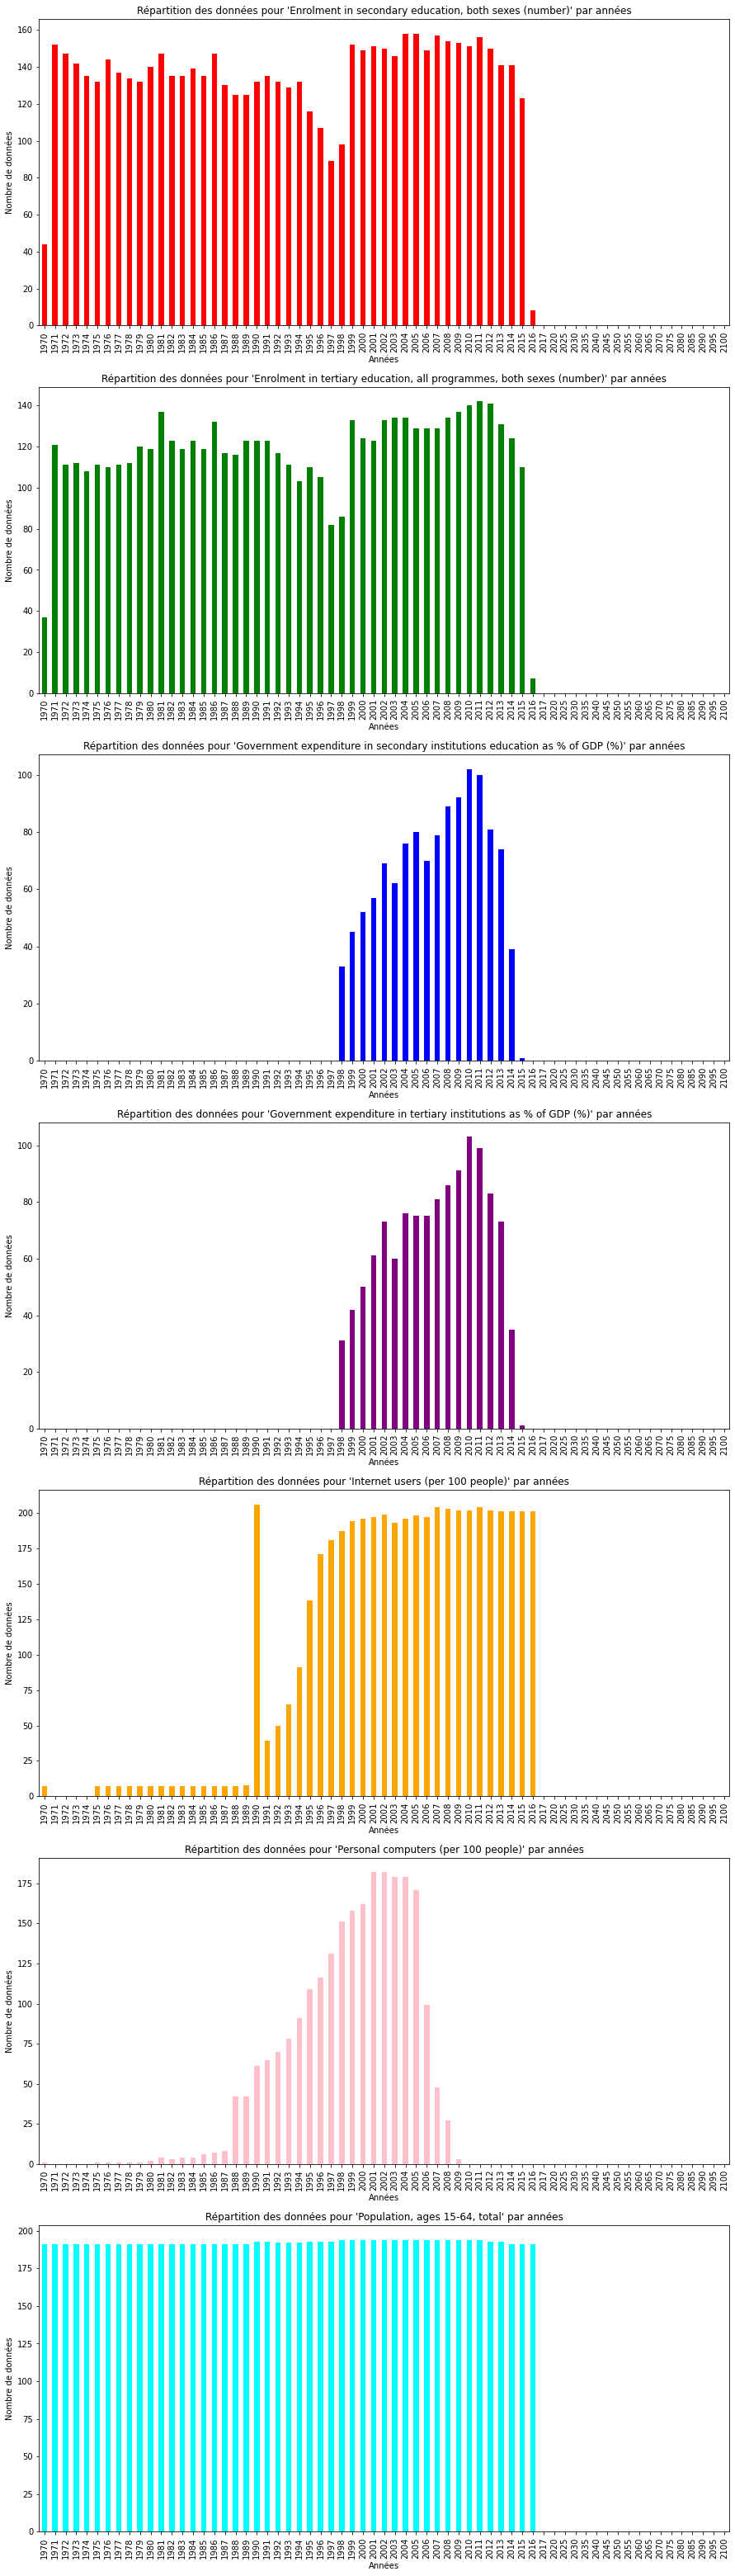

In [33]:
#On va maintenant visualiser le nombre de valeurs non manquantes par indicateur
#Pour ce faire, on commence par créer une liste de nos indicateurs (uniques)
indicateurs_uniques = data_join['Indicator Name'].unique()

#On augmente la taille du graph, c'était illisible sans
fig, axes = plt.subplots(figsize=(15, 8 * len(indicateurs_uniques)))

#On ajoute une couleur par indicateur (on en a 7)
colors = ['red', 'green', 'blue', 'purple', 'orange', 'pink', 'cyan']

#Cela va permettre de créer un graphique par indicateur
for i, nom_indicateur in enumerate(indicateurs_uniques):
    plt.subplot(len(indicateurs_uniques), 1, i+1)
    
    #On filtre le dataframe par indicateur
    data_filtre = data_join[data_join['Indicator Name'] == nom_indicateur]
    
    #On calcule le nombre de valeurs non nulles par an (toujours par indicateur)
    data_non_null = data_filtre.loc[:, '1970':'2100'].notnull().sum()
    
    #On fait des barplots, et on applique nos couleurs
    ax = data_non_null.plot(kind='bar', color=colors[i])
    
    #Titre et nom des axes
    ax.set_title(f"Répartition des données pour '{nom_indicateur}' par années")
    ax.set_ylabel('Nombre de données')
    ax.set_xlabel('Années')

plt.show()

On constate que nos données s'arrêtent entre 2014 et 2016, sauf pour les PC où on perd énormément de données après 2005. Les données sur les dépenses gouvernementales n'apparaissent qu'en 1998.

Il me semble qu'on peut réduire notre nombre de colonnes en ne conservant que les données de 2000 à 2015, puis on isolera en temps voulu les années les plus intéressantes en fonction des indicateurs à observer.

In [34]:
#Les colonnes à garder sont donc les 1ères colonnes du dataframe + les années 2000 à 2015
pd.set_option('display.float_format', '{:.1f}'.format)
data_drop_years = data_join[data_join.columns[:6].tolist() + list(map(str, range(2000, 2016)))]
data_drop_years

Country Name Country Code              Region Income Group  \
0     Afghanistan          AFG          South Asia   Low income   
1     Afghanistan          AFG          South Asia   Low income   
2     Afghanistan          AFG          South Asia   Low income   
3     Afghanistan          AFG          South Asia   Low income   
4     Afghanistan          AFG          South Asia   Low income   
...           ...          ...                 ...          ...   
1514     Zimbabwe          ZWE  Sub-Saharan Africa   Low income   
1515     Zimbabwe          ZWE  Sub-Saharan Africa   Low income   
1516     Zimbabwe          ZWE  Sub-Saharan Africa   Low income   
1517     Zimbabwe          ZWE  Sub-Saharan Africa   Low income   
1518     Zimbabwe          ZWE  Sub-Saharan Africa   Low income   

                                         Indicator Name  \
0     Enrolment in secondary education, both sexes (...   
1     Enrolment in tertiary education, all programme...   
2     Government expenditure in secondary institutio...   
3     Government expenditure in tertiary institution...   
4                       Internet users (per 100 people)   
...                                                 ...   
1514  Government expenditure in secondary institutio...   
1515  Government expenditure in tertiary institution...   
1516                    Internet users (per 100 people)   
1517                Personal computers (per 100 people)   
1518                      Population, ages 15-64, total   

                   Indicator Code      2000      2001      2002      2003  \
0                     SE.SEC.ENRL       NaN  362415.0       NaN  406895.0   
1                     SE.TER.ENRL       NaN       NaN       NaN   26211.0   
2     XGDP.23.FSGOV.FDINSTADM.FFD       NaN       NaN       NaN       NaN   
3     XGDP.56.FSGOV.FDINSTADM.FFD       NaN       NaN       NaN       NaN   
4                  IT.NET.USER.P2       NaN       0.0       0.0       0.1   
...                           ...       ...       ...       ...       ...   
1514  XGDP.23.FSGOV.FDINSTADM.FFD       NaN       NaN       NaN       NaN   
1515  XGDP.56.FSGOV.FDINSTADM.FFD       NaN       NaN       NaN       NaN   
1516               IT.NET.USER.P2       0.4       0.8       1.1       1.8   
1517               IT.CMP.PCMP.P2       1.6       1.6       4.7       4.9   
1518               SP.POP.1564.TO 6613628.0 6719788.0 6819300.0 6916640.0   

      ...      2006      2007      2008      2009      2010      2011  \
0     ... 1006841.0 1035782.0 1425009.0 1716190.0 2044157.0 2208963.0   
1     ...       NaN       NaN       NaN   95185.0       NaN   97504.0   
2     ...       NaN       NaN       NaN       NaN       NaN       NaN   
3     ...       NaN       NaN       NaN       NaN       NaN       NaN   
4     ...       2.1       1.9       1.8       3.5       4.0       5.0   
...   ...       ...       ...       ...       ...       ...       ...   
1514  ...       NaN       NaN       NaN       NaN       0.5       NaN   
1515  ...       NaN       NaN       NaN       0.3       0.4       NaN   
1516  ...       2.4       3.0       3.5       4.0       6.4       8.4   
1517  ...       6.8       NaN       7.4       NaN       NaN       NaN   
1518  ... 7245873.0 7372961.0 7507911.0 7652639.0 7807808.0 7982992.0   

          2012      2013      2014      2015  
0    2415884.0 2538420.0 2602734.0 2698816.0  
1          NaN       NaN  262874.0       NaN  
2          NaN       NaN       NaN       NaN  
3          NaN       NaN       NaN       NaN  
4          5.5       5.9       7.0       8.3  
...        ...       ...       ...       ...  
1514       NaN       NaN       NaN       NaN  
1515       NaN       NaN       NaN       NaN  
1516      12.0      15.5      16.4      22.7  
1517       NaN       NaN       NaN       NaN  
1518 8171080.0 8369351.0 8575500.0 8788963.0  

[1519 rows x 22 columns]

In [35]:
#On compte le nombre de valeurs manquantes par pays dans les colonnes années
#Rappel que comme on a 7 indicateurs et 16 années par pays, le maximum possible est 112
data_copie = data_drop_years.copy()
data_copie['Valeurs manquantes'] = data_drop_years[list(map(str, range(2000, 2016)))].isna().sum(axis=1)
data_groupby_isna = data_copie.groupby('Country Name')['Valeurs manquantes'].sum().reset_index()
data_groupby_isna.sort_values('Valeurs manquantes', ascending=False)

Country Name  Valeurs manquantes
104                    Kosovo                 112
93                Isle of Man                 112
145  Northern Mariana Islands                 112
182  St. Martin (French part)                 112
3              American Samoa                 111
..                        ...                 ...
188               Switzerland                  13
187                    Sweden                  13
178                     Spain                  13
141               New Zealand                  13
172           Slovak Republic                  12

[217 rows x 2 columns]

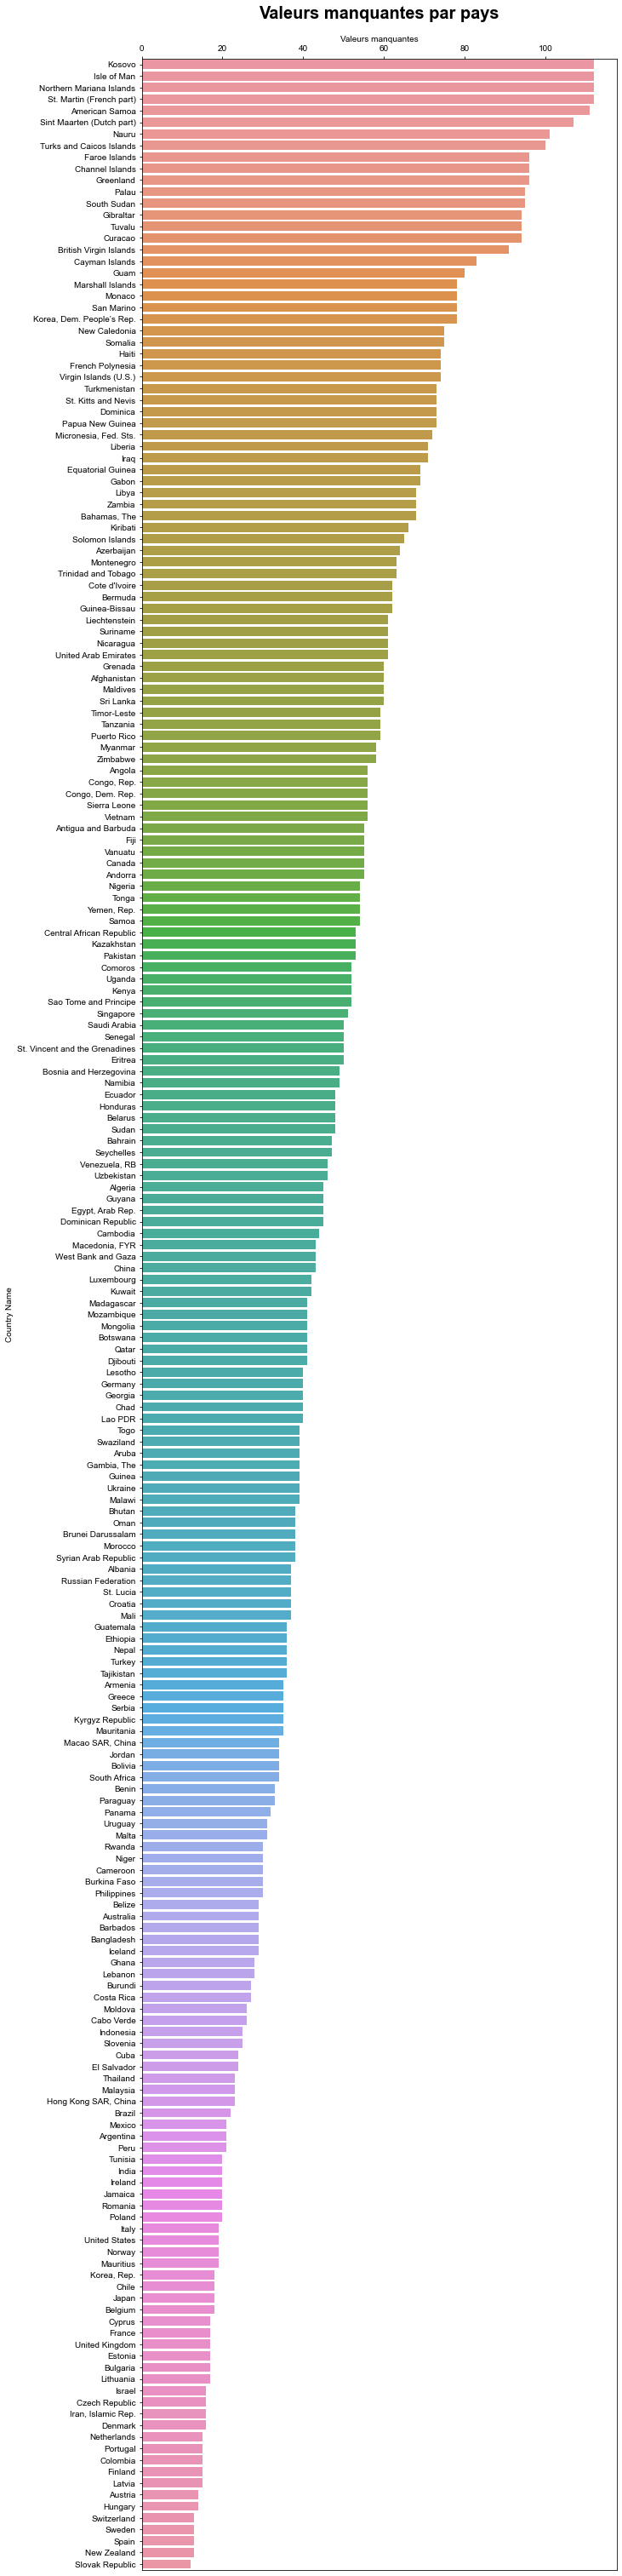

In [36]:
#Pour visualiser
plt.figure(figsize=(10, len(data_groupby_isna) / 4))
g1 = sns.barplot(x='Valeurs manquantes', y='Country Name', data=data_groupby_isna.sort_values('Valeurs manquantes', ascending=False))
plt.title("Valeurs manquantes par pays", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Valeurs manquantes")
plt.ylabel("Country Name")
sns.set_theme(style='whitegrid', palette='dark')
g1.xaxis.set_ticks_position('top')
g1.xaxis.set_label_position('top')
plt.show()

In [37]:
#Je décide arbitrairement que 80 valeurs manquantes sur 112 c'est trop
liste_pays_isna = data_groupby_isna[data_groupby_isna['Valeurs manquantes'] >= 80]['Country Name'].tolist()
liste_pays_isna

['American Samoa',
 'British Virgin Islands',
 'Cayman Islands',
 'Channel Islands',
 'Curacao',
 'Faroe Islands',
 'Gibraltar',
 'Greenland',
 'Guam',
 'Isle of Man',
 'Kosovo',
 'Nauru',
 'Northern Mariana Islands',
 'Palau',
 'Sint Maarten (Dutch part)',
 'South Sudan',
 'St. Martin (French part)',
 'Turks and Caicos Islands',
 'Tuvalu']

In [38]:
#On note que les 3 pays de tout à l'heure, Gibraltar, Nauru et les Îles Vierges britanniques figurent dans la liste
#On retire
data_drop_isna = data_drop_years.loc[~data_drop_years['Country Name'].isin(liste_pays_isna)].reset_index(drop=True)
data_drop_isna

Country Name Country Code              Region Income Group  \
0     Afghanistan          AFG          South Asia   Low income   
1     Afghanistan          AFG          South Asia   Low income   
2     Afghanistan          AFG          South Asia   Low income   
3     Afghanistan          AFG          South Asia   Low income   
4     Afghanistan          AFG          South Asia   Low income   
...           ...          ...                 ...          ...   
1381     Zimbabwe          ZWE  Sub-Saharan Africa   Low income   
1382     Zimbabwe          ZWE  Sub-Saharan Africa   Low income   
1383     Zimbabwe          ZWE  Sub-Saharan Africa   Low income   
1384     Zimbabwe          ZWE  Sub-Saharan Africa   Low income   
1385     Zimbabwe          ZWE  Sub-Saharan Africa   Low income   

                                         Indicator Name  \
0     Enrolment in secondary education, both sexes (...   
1     Enrolment in tertiary education, all programme...   
2     Government expenditure in secondary institutio...   
3     Government expenditure in tertiary institution...   
4                       Internet users (per 100 people)   
...                                                 ...   
1381  Government expenditure in secondary institutio...   
1382  Government expenditure in tertiary institution...   
1383                    Internet users (per 100 people)   
1384                Personal computers (per 100 people)   
1385                      Population, ages 15-64, total   

                   Indicator Code      2000      2001      2002      2003  \
0                     SE.SEC.ENRL       NaN  362415.0       NaN  406895.0   
1                     SE.TER.ENRL       NaN       NaN       NaN   26211.0   
2     XGDP.23.FSGOV.FDINSTADM.FFD       NaN       NaN       NaN       NaN   
3     XGDP.56.FSGOV.FDINSTADM.FFD       NaN       NaN       NaN       NaN   
4                  IT.NET.USER.P2       NaN       0.0       0.0       0.1   
...                           ...       ...       ...       ...       ...   
1381  XGDP.23.FSGOV.FDINSTADM.FFD       NaN       NaN       NaN       NaN   
1382  XGDP.56.FSGOV.FDINSTADM.FFD       NaN       NaN       NaN       NaN   
1383               IT.NET.USER.P2       0.4       0.8       1.1       1.8   
1384               IT.CMP.PCMP.P2       1.6       1.6       4.7       4.9   
1385               SP.POP.1564.TO 6613628.0 6719788.0 6819300.0 6916640.0   

      ...      2006      2007      2008      2009      2010      2011  \
0     ... 1006841.0 1035782.0 1425009.0 1716190.0 2044157.0 2208963.0   
1     ...       NaN       NaN       NaN   95185.0       NaN   97504.0   
2     ...       NaN       NaN       NaN       NaN       NaN       NaN   
3     ...       NaN       NaN       NaN       NaN       NaN       NaN   
4     ...       2.1       1.9       1.8       3.5       4.0       5.0   
...   ...       ...       ...       ...       ...       ...       ...   
1381  ...       NaN       NaN       NaN       NaN       0.5       NaN   
1382  ...       NaN       NaN       NaN       0.3       0.4       NaN   
1383  ...       2.4       3.0       3.5       4.0       6.4       8.4   
1384  ...       6.8       NaN       7.4       NaN       NaN       NaN   
1385  ... 7245873.0 7372961.0 7507911.0 7652639.0 7807808.0 7982992.0   

          2012      2013      2014      2015  
0    2415884.0 2538420.0 2602734.0 2698816.0  
1          NaN       NaN  262874.0       NaN  
2          NaN       NaN       NaN       NaN  
3          NaN       NaN       NaN       NaN  
4          5.5       5.9       7.0       8.3  
...        ...       ...       ...       ...  
1381       NaN       NaN       NaN       NaN  
1382       NaN       NaN       NaN       NaN  
1383      12.0      15.5      16.4      22.7  
1384       NaN       NaN       NaN       NaN  
1385 8171080.0 8369351.0 8575500.0 8788963.0  

[1386 rows x 22 columns]

Il reste énormément de valeurs manquantes. On va vraisemblablement avoir recours à forward fill pour boucher les trous.

Mais avant, je veux d'abord m'atteler à la recherche d'outliers et valeurs aberrantes. On ne voudrait pas accidentellement forward fill des valeurs aberrantes.

Nos indicateurs s'exprimant dans des ordres de grandeur très différents, il me semble plus judicieux de nous pencher sur cette partie indicateur par indicateur, un peu comme on l'a fait pour les valeurs manquantes.

In [39]:
#On va utiliser une boucle après un groupby pour nous faciliter la tâche
recherche_valeurs_aberrantes = data_drop_isna.groupby('Indicator Name')

for indicator_name, indicateur in recherche_valeurs_aberrantes:
    print(f"Description de {indicator_name}:")
    print(indicateur.describe())
    print("\n") #Pour sortie plus lisible

Description de Enrolment in secondary education, both sexes (number):
            2000       2001       2002       2003       2004       2005  \
count      143.0      146.0      147.0      142.0      153.0      153.0   
mean   2558887.4  2574542.3  2848538.3  3113770.2  2396066.6  2412800.3   
std    9313928.1  9611995.4 10224508.8 10952260.3  7671223.1  7983618.1   
min        988.0     2971.0     3132.0     3194.0     3078.0     3142.0   
25%     111534.0   102500.0   101443.5   103966.0   102023.0    94496.0   
50%     421120.0   409291.0   461215.0   487866.5   431303.0   464952.0   
75%    1363732.5  1222532.5  1447438.0  1806061.5  1706234.0  2028388.0   
max   81487960.0 86516712.0 90722792.0 95624760.0 84569080.0 89461792.0   

             2006        2007        2008        2009        2010        2011  \
count       145.0       153.0       151.0       150.0       150.0       153.0   
mean    3095437.7   3187113.9   3248058.0   3349171.6   3294800.2   3356149.0   
std    1155

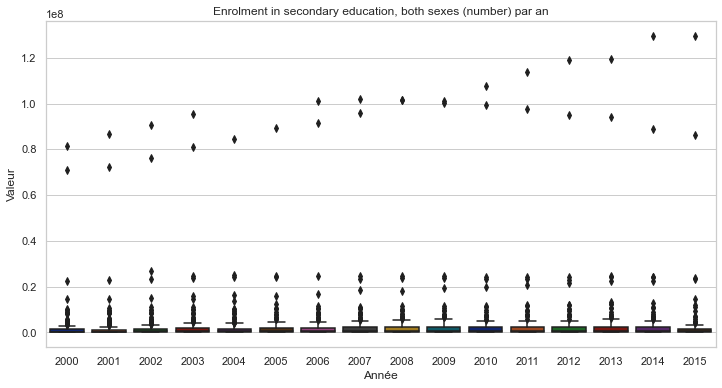

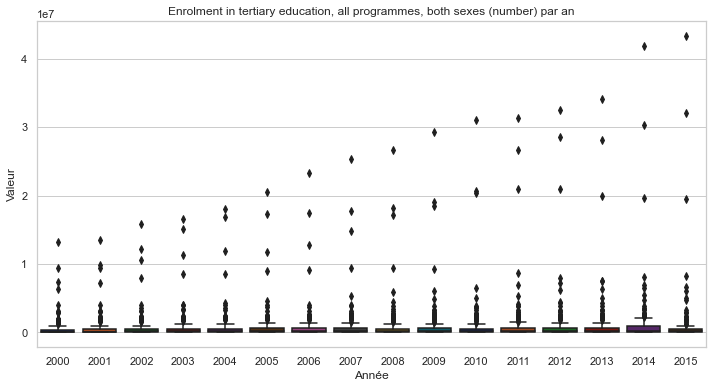

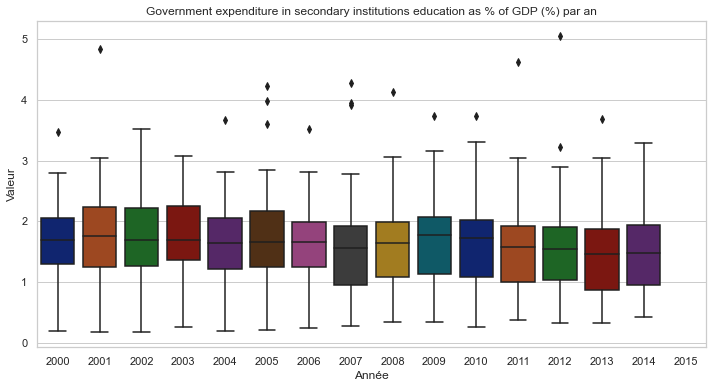

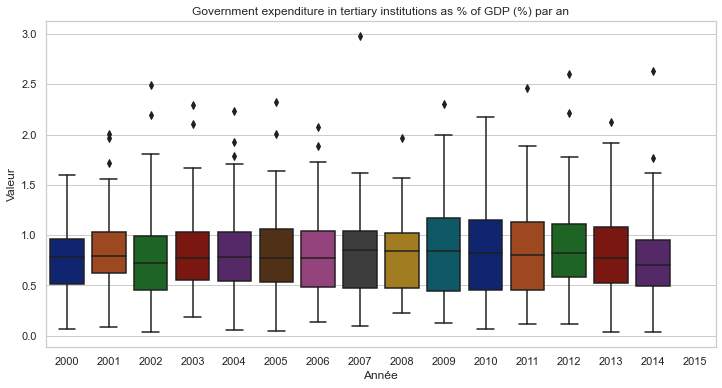

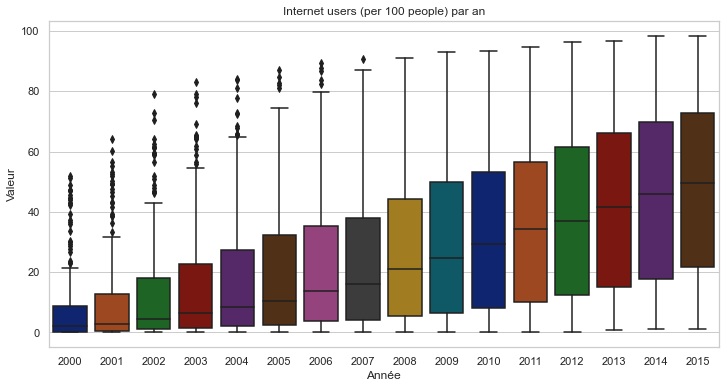

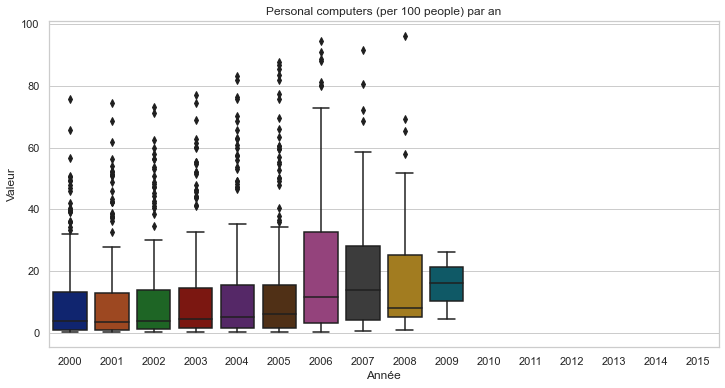

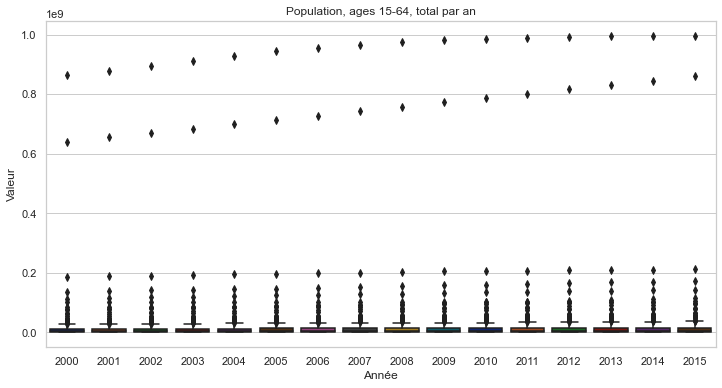

In [40]:
#Ca reste malgré tout assez peu lisible, même le count est redondant avec la recherche de valeurs manquantes
#Création d'un boxplot par année par indicateur pour mieux visualiser
for indicator_name, indicateur in recherche_valeurs_aberrantes:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=indicateur.iloc[:, 1:], palette='dark')
    plt.title(f"{indicator_name} par an")
    plt.xlabel("Année")
    plt.ylabel("Valeur")
    plt.show()

In [41]:
#Cela reste assez peu lisible pour 3 indicateurs (population et les 2 features scolarisation), mais ce n'est pas grave
#Sans surprise, la Chine et l'Inde écrasent la concurrence dans ces 3 domaines
#Je vérifie juste les années 2004, 2005 et 2008 car je ne vois qu'un seul point concernant le secondaire pour ces années
#On affiche plus de colonnes
pd.set_option('display.max_columns', 50)
data_drop_isna.loc[data_drop_isna['Indicator Name'] == "Enrolment in secondary education, both sexes (number)"].sort_values('2008', ascending=False).head(5)

Country Name Country Code                     Region  \
553           India          IND                 South Asia   
259           China          CHN        East Asia & Pacific   
1309  United States          USA              North America   
175          Brazil          BRA  Latin America & Caribbean   
560       Indonesia          IDN        East Asia & Pacific   

             Income Group                                     Indicator Name  \
553   Lower middle income  Enrolment in secondary education, both sexes (...   
259   Upper middle income  Enrolment in secondary education, both sexes (...   
1309    High income: OECD  Enrolment in secondary education, both sexes (...   
175   Upper middle income  Enrolment in secondary education, both sexes (...   
560   Lower middle income  Enrolment in secondary education, both sexes (...   

     Indicator Code       2000       2001       2002       2003       2004  \
553     SE.SEC.ENRL 71030512.0 72392728.0 76215688.0 81050128.0 84569080.0   
259     SE.SEC.ENRL 81487960.0 86516712.0 90722792.0 95624760.0        NaN   
1309    SE.SEC.ENRL 22593562.0 23087042.0 23196310.0 23854458.0 24185786.0   
175     SE.SEC.ENRL        NaN        NaN 26789210.0 24592568.0 25155104.0   
560     SE.SEC.ENRL 14720390.0 14828085.0 15140713.0 15872535.0 16353933.0   

           2005        2006        2007        2008        2009        2010  \
553  89461792.0  91529432.0  96049056.0 101783936.0 101110384.0 107686864.0   
259         NaN 101195120.0 101830968.0 101448264.0 100392464.0  99218080.0   
1309 24431934.0  24552316.0  24731028.0  24692888.0  24524564.0  24192786.0   
175  24863112.0         NaN  23423870.0  23645668.0  23616942.0  23538716.0   
560  15993187.0  16797808.0  18716928.0  18314900.0  19520704.0  19975916.0   

            2011        2012        2013        2014        2015  
553  113727864.0 119148200.0 119400528.0 129438992.0 129542056.0  
259   97452464.0  95004208.0  94324416.0  88691792.0  86127200.0  
1309  24214304.0  24122436.0  24095460.0  24229776.0         NaN  
175   23399408.0  23134072.0  24881382.0  24224944.0  23501784.0  
560   20777856.0  21445796.0  22322494.0  22586956.0  23756316.0

In [42]:
#Démarche similaire avec l'enseignement supérieur
data_drop_isna.loc[data_drop_isna['Indicator Name'] == "Enrolment in tertiary education, all programmes, both sexes (number)"].sort_values('2015', ascending=False).head(5)

Country Name Country Code                     Region  \
260                China          CHN        East Asia & Pacific   
554                India          IND                 South Asia   
1310       United States          USA              North America   
176               Brazil          BRA  Latin America & Caribbean   
1023  Russian Federation          RUS      Europe & Central Asia   

              Income Group                                     Indicator Name  \
260    Upper middle income  Enrolment in tertiary education, all programme...   
554    Lower middle income  Enrolment in tertiary education, all programme...   
1310     High income: OECD  Enrolment in tertiary education, all programme...   
176    Upper middle income  Enrolment in tertiary education, all programme...   
1023  High income: nonOECD  Enrolment in tertiary education, all programme...   

     Indicator Code       2000       2001       2002       2003       2004  \
260     SE.TER.ENRL  7364111.0  9398581.0 12143723.0 15186217.0 18090814.0   
554     SE.TER.ENRL  9404460.0  9834046.0 10576653.0 11295041.0 11852936.0   
1310    SE.TER.ENRL 13202880.0 13595580.0 15927987.0 16611711.0 16900472.0   
176     SE.TER.ENRL  2781328.0  3125745.0  3582105.0  3994422.0  4275027.0   
1023    SE.TER.ENRL  6331324.0  7167618.0  7965217.0  8592271.0  8605952.0   

           2005       2006       2007       2008       2009       2010  \
260  20601220.0 23360536.0 25346280.0 26691696.0 29295840.0 31046736.0   
554  11777296.0 12852684.0 14862962.0 17211216.0 18500324.0 20740740.0   
1310 17272044.0 17487476.0 17758870.0 18248124.0 19102814.0 20427708.0   
176   4572297.0        NaN  5272877.0  5958135.0  6115138.0  6552707.0   
1023  9003208.0  9167277.0  9370428.0  9446408.0  9330115.0        NaN   

           2011       2012       2013       2014       2015  
260  31308378.0 32585960.0 34091288.0 41924200.0 43367392.0  
554  26650952.0 28568408.0 28175136.0 30305848.0 32107420.0  
1310 21016126.0 20994112.0 19972624.0 19700220.0 19531728.0  
176   6929324.0  7241405.0  7541112.0  8072146.0  8285475.0  
1023  8652607.0  7983111.0  7528163.0  6995732.0  6592416.0

In [43]:
#Comme convenu, on créé une copie du df source et on utilise forward fill sur les lignes des colonnes numériques
#Mais d'abord
pd.reset_option('display.max_columns')
data_fill = data_drop_isna.copy()
data_fill[list(map(str, range(2000, 2016)))] = data_fill[list(map(str, range(2000, 2016)))].ffill(axis=1)
data_fill

Country Name Country Code              Region Income Group  \
0     Afghanistan          AFG          South Asia   Low income   
1     Afghanistan          AFG          South Asia   Low income   
2     Afghanistan          AFG          South Asia   Low income   
3     Afghanistan          AFG          South Asia   Low income   
4     Afghanistan          AFG          South Asia   Low income   
...           ...          ...                 ...          ...   
1381     Zimbabwe          ZWE  Sub-Saharan Africa   Low income   
1382     Zimbabwe          ZWE  Sub-Saharan Africa   Low income   
1383     Zimbabwe          ZWE  Sub-Saharan Africa   Low income   
1384     Zimbabwe          ZWE  Sub-Saharan Africa   Low income   
1385     Zimbabwe          ZWE  Sub-Saharan Africa   Low income   

                                         Indicator Name  \
0     Enrolment in secondary education, both sexes (...   
1     Enrolment in tertiary education, all programme...   
2     Government expenditure in secondary institutio...   
3     Government expenditure in tertiary institution...   
4                       Internet users (per 100 people)   
...                                                 ...   
1381  Government expenditure in secondary institutio...   
1382  Government expenditure in tertiary institution...   
1383                    Internet users (per 100 people)   
1384                Personal computers (per 100 people)   
1385                      Population, ages 15-64, total   

                   Indicator Code      2000      2001      2002      2003  \
0                     SE.SEC.ENRL       NaN  362415.0  362415.0  406895.0   
1                     SE.TER.ENRL       NaN       NaN       NaN   26211.0   
2     XGDP.23.FSGOV.FDINSTADM.FFD       NaN       NaN       NaN       NaN   
3     XGDP.56.FSGOV.FDINSTADM.FFD       NaN       NaN       NaN       NaN   
4                  IT.NET.USER.P2       NaN       0.0       0.0       0.1   
...                           ...       ...       ...       ...       ...   
1381  XGDP.23.FSGOV.FDINSTADM.FFD       NaN       NaN       NaN       NaN   
1382  XGDP.56.FSGOV.FDINSTADM.FFD       NaN       NaN       NaN       NaN   
1383               IT.NET.USER.P2       0.4       0.8       1.1       1.8   
1384               IT.CMP.PCMP.P2       1.6       1.6       4.7       4.9   
1385               SP.POP.1564.TO 6613628.0 6719788.0 6819300.0 6916640.0   

      ...      2006      2007      2008      2009      2010      2011  \
0     ... 1006841.0 1035782.0 1425009.0 1716190.0 2044157.0 2208963.0   
1     ...   27648.0   27648.0   27648.0   95185.0   95185.0   97504.0   
2     ...       NaN       NaN       NaN       NaN       NaN       NaN   
3     ...       NaN       NaN       NaN       NaN       NaN       NaN   
4     ...       2.1       1.9       1.8       3.5       4.0       5.0   
...   ...       ...       ...       ...       ...       ...       ...   
1381  ...       NaN       NaN       NaN       NaN       0.5       0.5   
1382  ...       NaN       NaN       NaN       0.3       0.4       0.4   
1383  ...       2.4       3.0       3.5       4.0       6.4       8.4   
1384  ...       6.8       6.8       7.4       7.4       7.4       7.4   
1385  ... 7245873.0 7372961.0 7507911.0 7652639.0 7807808.0 7982992.0   

          2012      2013      2014      2015  
0    2415884.0 2538420.0 2602734.0 2698816.0  
1      97504.0   97504.0  262874.0  262874.0  
2          NaN       NaN       NaN       NaN  
3          NaN       NaN       NaN       NaN  
4          5.5       5.9       7.0       8.3  
...        ...       ...       ...       ...  
1381       0.5       0.5       0.5       0.5  
1382       0.4       0.4       0.4       0.4  
1383      12.0      15.5      16.4      22.7  
1384       7.4       7.4       7.4       7.4  
1385 8171080.0 8369351.0 8575500.0 8788963.0  

[1386 rows x 22 columns]

On identifie aisément 2 outliers par leurs populations gargantuesques, à savoir la Chine et l'Inde. Les Etats-Unis se démarquent dans l'enseignement supérieur également. Mais pas de valeurs aberrantes a priori.

Ne pas se fier aux derniers boxplots des PCs, comme vu plus haut on a beaucoup de valeurs manquantes sur cet indicateur passé 2005.
# III) Pré-analyse des données <a class="anchor" id="iii"></a>
## 1) Par région <a class="anchor" id="iii1"></a>

In [44]:
#On utilise sum() ici, donc on va s'intéresser aux indicateurs scolarisation et population
#Pour les indicateurs en pourcentage, on utilisera la moyenne ou la médiane
groupby_indicator_region = data_fill.groupby(['Indicator Name', 'Region'])[list(map(str, range(2000, 2016)))].sum()
groupby_indicator_region

2000  \
Indicator Name                                     Region                                    
Enrolment in secondary education, both sexes (n... East Asia & Pacific         117534221.0   
                                                   Europe & Central Asia        66622433.0   
                                                   Latin America & Caribbean    27792003.0   
                                                   Middle East & North Africa   28669779.0   
                                                   North America                25112642.0   
                                                   South Asia                   82753040.0   
                                                   Sub-Saharan Africa           17436787.0   
Enrolment in tertiary education, all programmes... East Asia & Pacific          21800383.0   
                                                   Europe & Central Asia        24325942.0   
                                                   Latin America & Caribbean    10454335.0   
                                                   Middle East & North Africa    3455189.0   
                                                   North America                14415041.0   
                                                   South Asia                   10225562.0   
                                                   Sub-Saharan Africa             702176.0   
Government expenditure in secondary institution... East Asia & Pacific                13.8   
                                                   Europe & Central Asia              32.8   
                                                   Latin America & Caribbean          20.8   
                                                   Middle East & North Africa          7.8   
                                                   North America                       1.8   
                                                   South Asia                          2.4   
                                                   Sub-Saharan Africa                  7.0   
Government expenditure in tertiary institutions... East Asia & Pacific                 6.3   
                                                   Europe & Central Asia              17.2   
                                                   Latin America & Caribbean           8.0   
                                                   Middle East & North Africa          3.3   
                                                   North America                       0.8   
                                                   South Asia                          1.4   
                                                   Sub-Saharan Africa                  2.3   
Internet users (per 100 people)                    East Asia & Pacific               322.0   
                                                   Europe & Central Asia             823.7   
                                                   Latin America & Caribbean         186.5   
                                                   Middle East & North Africa         98.9   
                                                   North America                     137.3   
                                                   South Asia                          4.1   
                                                   Sub-Saharan Africa                 39.9   
Personal computers (per 100 people)                East Asia & Pacific               313.8   
                                                   Europe & Central Asia             859.5   
                                                   Latin America & Caribbean         176.0   
                                                   Middle East & North Africa        134.4   
                                                   North America                     146.3   
                                                   South Asia                          6.6   
                                            

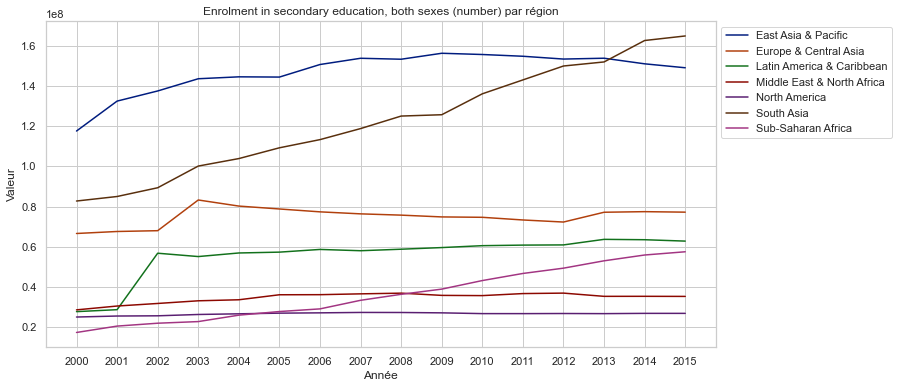

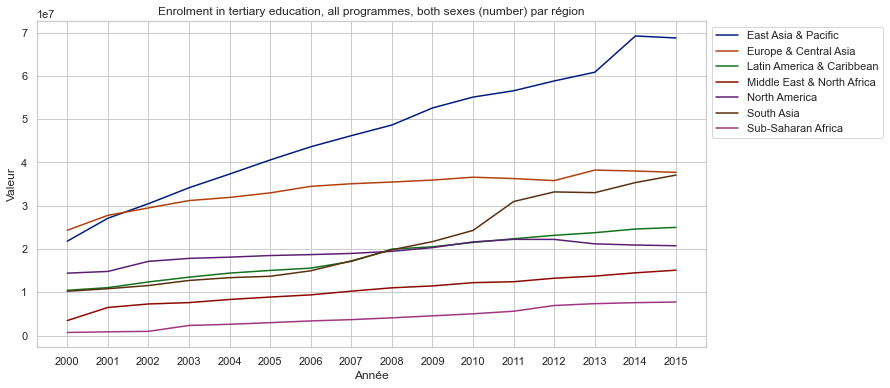

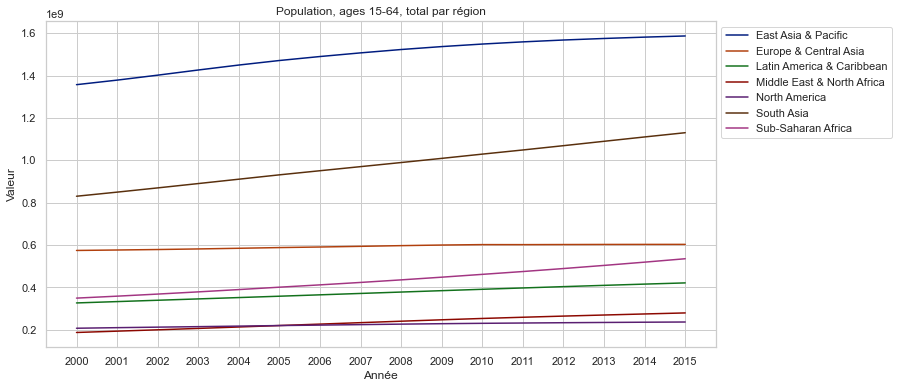

In [45]:
indicateurs = groupby_indicator_region.index.get_level_values('Indicator Name').unique()

#Raison donnée plus haut
indicateurs_à_garder = ["Enrolment in secondary education, both sexes (number)",
                      "Enrolment in tertiary education, all programmes, both sexes (number)",
                      "Population, ages 15-64, total"]

#Un lineplot par indicateur à garder
for indicateur in indicateurs_à_garder:
    plt.figure(figsize=(12, 6))
    
    #Sélection des valeurs par indicateur
    valeurs_par_indicateur = groupby_indicator_region.loc[indicateur, :]

    for region in valeurs_par_indicateur.index.get_level_values('Region').unique():
        plt.plot(valeurs_par_indicateur.loc[region, :], label=region)

    plt.title(f"{indicateur} par région")
    plt.xlabel("Année")
    plt.ylabel("Valeur")
    plt.legend(bbox_to_anchor=[1,1])
    plt.show()

Encore une fois, sans trop de surprise East Asia & Pacific et South Asia se distinguent. L'Europe semble en tête du peloton regroupant les autres régions et brille particulièrement dans l'enseignement supérieur compte tenu de sa plus faible population. L'Amérique du Nord est particulièrement basse dans la liste car elle n'est comprise que de trois pays (USA, Canada et Bermudes).

Les valeurs sont globalement à la hausse.

In [46]:
#On enchaîne avec nos 4 derniers indicateurs, on les exprimera avec la moyenne
#(J'ai essayé la médiane aussi et n'ai pas constaté de différences majeures)
groupby_indicator_region2 = data_fill.groupby(['Indicator Name', 'Region'])[list(map(str, range(2000, 2016)))].mean()
groupby_indicator_region2

2000  \
Indicator Name                                     Region                                   
Enrolment in secondary education, both sexes (n... East Asia & Pacific          6186011.6   
                                                   Europe & Central Asia        1514146.2   
                                                   Latin America & Caribbean    1068923.2   
                                                   Middle East & North Africa   1686457.6   
                                                   North America               12556321.0   
                                                   South Asia                  16550608.0   
                                                   Sub-Saharan Africa            581226.2   
Enrolment in tertiary education, all programmes... East Asia & Pacific          1211132.4   
                                                   Europe & Central Asia         565719.6   
                                                   Latin America & Caribbean     580796.4   
                                                   Middle East & North Africa    287932.4   
                                                   North America                7207520.5   
                                                   South Asia                   3408520.7   
                                                   Sub-Saharan Africa             28087.0   
Government expenditure in secondary institution... East Asia & Pacific                1.7   
                                                   Europe & Central Asia              2.0   
                                                   Latin America & Caribbean          1.3   
                                                   Middle East & North Africa         2.0   
                                                   North America                      1.8   
                                                   South Asia                         1.2   
                                                   Sub-Saharan Africa                 1.4   
Government expenditure in tertiary institutions... East Asia & Pacific                0.8   
                                                   Europe & Central Asia              0.9   
                                                   Latin America & Caribbean          0.7   
                                                   Middle East & North Africa         1.1   
                                                   North America                      0.8   
                                                   South Asia                         0.7   
                                                   Sub-Saharan Africa                 0.5   
Internet users (per 100 people)                    East Asia & Pacific               11.1   
                                                   Europe & Central Asia             16.5   
                                                   Latin America & Caribbean          5.2   
                                                   Middle East & North Africa         4.9   
                                                   North America                     45.8   
                                                   South Asia                         0.7   
                                                   Sub-Saharan Africa                 0.8   
Personal computers (per 100 people)                East Asia & Pacific               11.6   
                                                   Europe & Central Asia             22.0   
                                                   Latin America & Caribbean          6.3   
                                                   Middle East & North Africa         7.5   
                                                   North America                     48.8   
                                                   South Asia                         0.9   
                                                   Sub-Saharan Africa                 

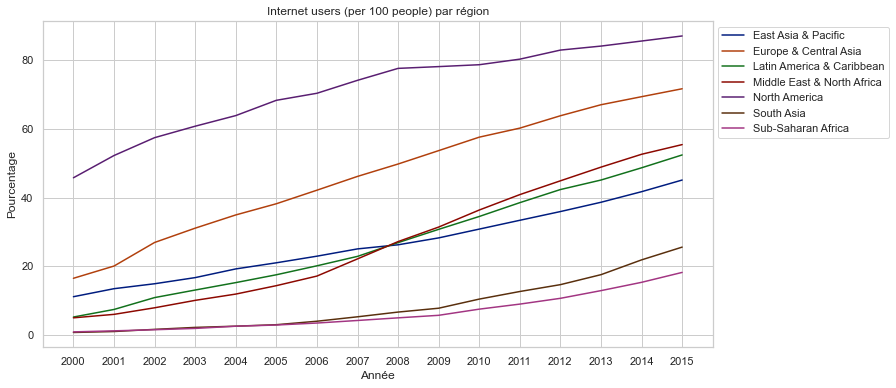

In [47]:
#On ne met pas les 4 indicateurs dans la boucle d'un coup car on doit faire le ménage sur les années pour certains d'entre eux
indicateur_à_garder = "Internet users (per 100 people)"

plt.figure(figsize=(12, 6))

#Sélection des valeurs par indicateur
valeurs_par_indicateur = groupby_indicator_region2.loc[indicateur_à_garder, :]

for region in valeurs_par_indicateur.index.get_level_values('Region').unique():
    plt.plot(valeurs_par_indicateur.loc[region, :], label=region)

plt.title(f"{indicateur_à_garder} par région")
plt.xlabel("Année")
plt.ylabel("Pourcentage")
plt.legend(bbox_to_anchor=[1,1])
plt.show()

L'Amérique du Nord et l'Europe sur ses talons sont en tête des débats en terme de couverture internet. L'Afrique sub-saharienne et l'Asie du Sud sont un peu à la traîne, mais malgré tout globalement les valeurs sont en forte hausse.

In [48]:
#Pour les dépenses gouvernementales, nos données s'arrêtent après 2013
groupby_indicator_region3 = groupby_indicator_region2.drop(columns=['2014','2015'])
groupby_indicator_region3

2000  \
Indicator Name                                     Region                                   
Enrolment in secondary education, both sexes (n... East Asia & Pacific          6186011.6   
                                                   Europe & Central Asia        1514146.2   
                                                   Latin America & Caribbean    1068923.2   
                                                   Middle East & North Africa   1686457.6   
                                                   North America               12556321.0   
                                                   South Asia                  16550608.0   
                                                   Sub-Saharan Africa            581226.2   
Enrolment in tertiary education, all programmes... East Asia & Pacific          1211132.4   
                                                   Europe & Central Asia         565719.6   
                                                   Latin America & Caribbean     580796.4   
                                                   Middle East & North Africa    287932.4   
                                                   North America                7207520.5   
                                                   South Asia                   3408520.7   
                                                   Sub-Saharan Africa             28087.0   
Government expenditure in secondary institution... East Asia & Pacific                1.7   
                                                   Europe & Central Asia              2.0   
                                                   Latin America & Caribbean          1.3   
                                                   Middle East & North Africa         2.0   
                                                   North America                      1.8   
                                                   South Asia                         1.2   
                                                   Sub-Saharan Africa                 1.4   
Government expenditure in tertiary institutions... East Asia & Pacific                0.8   
                                                   Europe & Central Asia              0.9   
                                                   Latin America & Caribbean          0.7   
                                                   Middle East & North Africa         1.1   
                                                   North America                      0.8   
                                                   South Asia                         0.7   
                                                   Sub-Saharan Africa                 0.5   
Internet users (per 100 people)                    East Asia & Pacific               11.1   
                                                   Europe & Central Asia             16.5   
                                                   Latin America & Caribbean          5.2   
                                                   Middle East & North Africa         4.9   
                                                   North America                     45.8   
                                                   South Asia                         0.7   
                                                   Sub-Saharan Africa                 0.8   
Personal computers (per 100 people)                East Asia & Pacific               11.6   
                                                   Europe & Central Asia             22.0   
                                                   Latin America & Caribbean          6.3   
                                                   Middle East & North Africa         7.5   
                                                   North America                     48.8   
                                                   South Asia                         0.9   
                                                   Sub-Saharan Africa                 

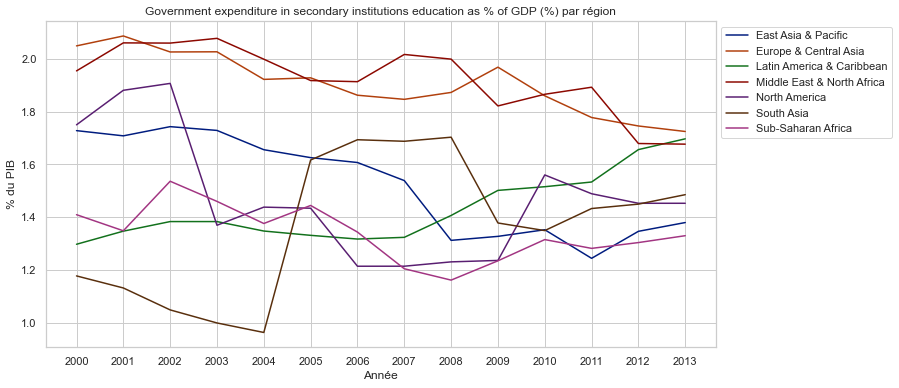

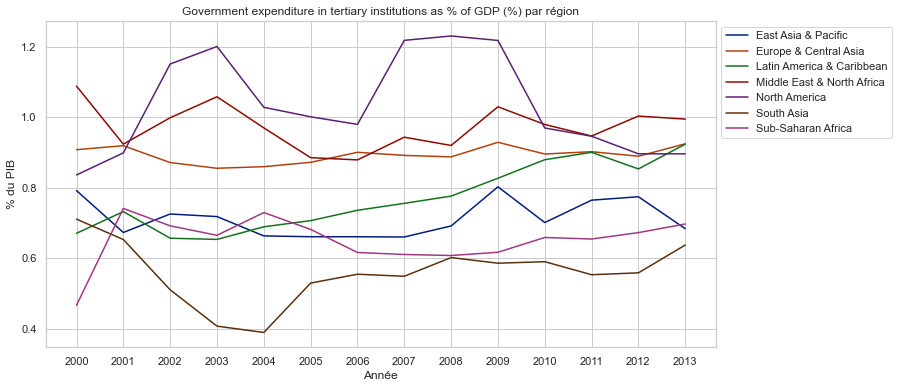

In [49]:
#Comme convenu
indicateurs_à_garder = ["Government expenditure in secondary institutions education as % of GDP (%)",
                       "Government expenditure in tertiary institutions as % of GDP (%)"]

#Comme tout à l'heure, un lineplot par indicateur à garder
for indicateur in indicateurs_à_garder:
    plt.figure(figsize=(12, 6))

    #Sélection des valeurs par indicateur
    valeurs_par_indicateur = groupby_indicator_region3.loc[indicateur, :]

    for region in valeurs_par_indicateur.index.get_level_values('Region').unique():
        plt.plot(valeurs_par_indicateur.loc[region, :], label=region)

    plt.title(f"{indicateur} par région")
    plt.xlabel("Année")
    plt.ylabel("% du PIB")
    plt.legend(bbox_to_anchor=[1,1])
    plt.show()

Il semblerait qu'entre régions les dépenses gouvernementale dans l'éducation soient assez homogènes ou tendent à s'homogénéiser sur les 3-4 dernières années.

In [50]:
#Enfin, pour les PC, on perd beaucoup de données après 2005
groupby_indicator_region4 = groupby_indicator_region3.drop(columns=list(map(str, range(2006, 2014))))
groupby_indicator_region4

2000  \
Indicator Name                                     Region                                   
Enrolment in secondary education, both sexes (n... East Asia & Pacific          6186011.6   
                                                   Europe & Central Asia        1514146.2   
                                                   Latin America & Caribbean    1068923.2   
                                                   Middle East & North Africa   1686457.6   
                                                   North America               12556321.0   
                                                   South Asia                  16550608.0   
                                                   Sub-Saharan Africa            581226.2   
Enrolment in tertiary education, all programmes... East Asia & Pacific          1211132.4   
                                                   Europe & Central Asia         565719.6   
                                                   Latin America & Caribbean     580796.4   
                                                   Middle East & North Africa    287932.4   
                                                   North America                7207520.5   
                                                   South Asia                   3408520.7   
                                                   Sub-Saharan Africa             28087.0   
Government expenditure in secondary institution... East Asia & Pacific                1.7   
                                                   Europe & Central Asia              2.0   
                                                   Latin America & Caribbean          1.3   
                                                   Middle East & North Africa         2.0   
                                                   North America                      1.8   
                                                   South Asia                         1.2   
                                                   Sub-Saharan Africa                 1.4   
Government expenditure in tertiary institutions... East Asia & Pacific                0.8   
                                                   Europe & Central Asia              0.9   
                                                   Latin America & Caribbean          0.7   
                                                   Middle East & North Africa         1.1   
                                                   North America                      0.8   
                                                   South Asia                         0.7   
                                                   Sub-Saharan Africa                 0.5   
Internet users (per 100 people)                    East Asia & Pacific               11.1   
                                                   Europe & Central Asia             16.5   
                                                   Latin America & Caribbean          5.2   
                                                   Middle East & North Africa         4.9   
                                                   North America                     45.8   
                                                   South Asia                         0.7   
                                                   Sub-Saharan Africa                 0.8   
Personal computers (per 100 people)                East Asia & Pacific               11.6   
                                                   Europe & Central Asia             22.0   
                                                   Latin America & Caribbean          6.3   
                                                   Middle East & North Africa         7.5   
                                                   North America                     48.8   
                                                   South Asia                         0.9   
                                                   Sub-Saharan Africa                 

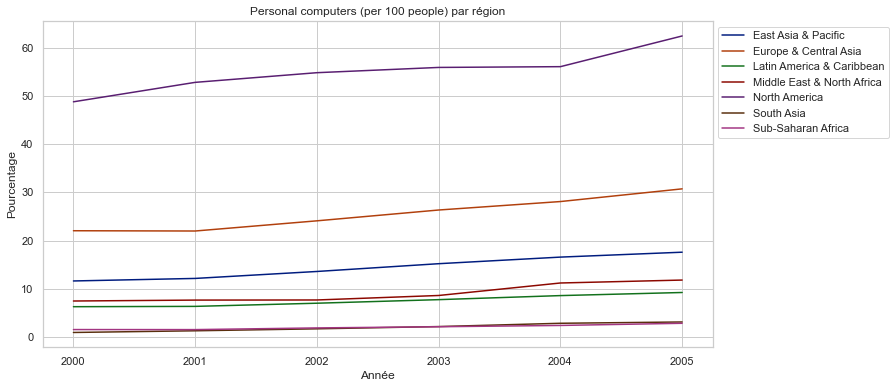

In [51]:
#Le dernier indicateur
indicateur_à_garder = "Personal computers (per 100 people)"

plt.figure(figsize=(12, 6))

#Sélection des valeurs par indicateur
valeurs_par_indicateur = groupby_indicator_region4.loc[indicateur_à_garder, :]

for region in valeurs_par_indicateur.index.get_level_values('Region').unique():
    plt.plot(valeurs_par_indicateur.loc[region, :], label=region)

plt.title(f"{indicateur_à_garder} par région")
plt.xlabel("Année")
plt.ylabel("Pourcentage")
plt.legend(bbox_to_anchor=[1,1])
plt.show()

Voilà encore un domaine dans lequel l'Amérique du Nord mène la danse, suivie de très loin par l'Europe, qui a elle-même une assez confortable avance sur le reste du peloton.

Encore une fois, les valeurs sont globalement à la hausse.

On notera cependant que les données datent un peu, faute de valeurs plus récente il faudra faire avec, mais on peut se permettre de supposer que chaque région est mieux équipée aujourd'hui qu'il y a 20 ans.
## 2) Par niveau de revenu <a class="anchor" id="iii2"></a>

In [52]:
#Concrètement on fait exactement la même chose qu'au point précédent, seulement le groupby se fait sur une autre colonne
#Les mêmes indicateurs que tout à l'heure avec sum()
groupby_indicator_income = data_fill.groupby(['Indicator Name', 'Income Group'])[list(map(str, range(2000, 2016)))].sum()
groupby_indicator_income

2000  \
Indicator Name                                     Income Group                        
Enrolment in secondary education, both sexes (n... High income: OECD      84015000.0   
                                                   High income: nonOECD    2225096.0   
                                                   Low income             21255595.0   
                                                   Lower middle income   117020592.0   
                                                   Upper middle income   141404622.0   
Enrolment in tertiary education, all programmes... High income: OECD      36098300.0   
                                                   High income: nonOECD    7184050.0   
                                                   Low income              1348960.0   
                                                   Lower middle income    17173564.0   
                                                   Upper middle income    23573754.0   
Government expenditure in secondary institution... High income: OECD            36.4   
                                                   High income: nonOECD          8.8   
                                                   Low income                    2.2   
                                                   Lower middle income          12.8   
                                                   Upper middle income          26.1   
Government expenditure in tertiary institutions... High income: OECD            18.4   
                                                   High income: nonOECD          3.7   
                                                   Low income                    1.6   
                                                   Lower middle income           4.7   
                                                   Upper middle income          11.1   
Internet users (per 100 people)                    High income: OECD           918.1   
                                                   High income: nonOECD        467.0   
                                                   Low income                    5.4   
                                                   Lower middle income          45.8   
                                                   Upper middle income         176.1   
Personal computers (per 100 people)                High income: OECD           990.1   
                                                   High income: nonOECD        422.6   
                                                   Low income                    9.2   
                                                   Lower middle income          56.7   
                                                   Upper middle income         218.0   
Population, ages 15-64, total                      High income: OECD     657151595.0   
                                                   High income: nonOECD  142382689.0   
                                                   Low income            346610716.0   
                                                   Lower middle income  1252056213.0   
                                                   Upper middle income  1435053126.0   

                                                                                2001  \
Indicator Name                                     Income Group                        
Enrolment in secondary education, both sexes (n... High income: OECD      84289021.0   
                                                   High income: nonOECD    2767207.0   
                                                   Low income             23417838.0   
                                                   Lower middle income   127594603.0   
                                                   Upper middle income   152516714.0   
Enrolment in tertiary education, all programmes... High income: OECD      37109039.0   
                                                   High income: nonOECD    8140181.0   
                               

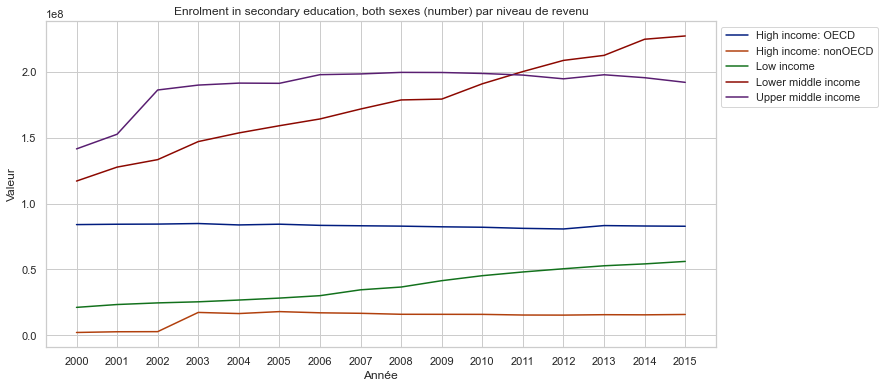

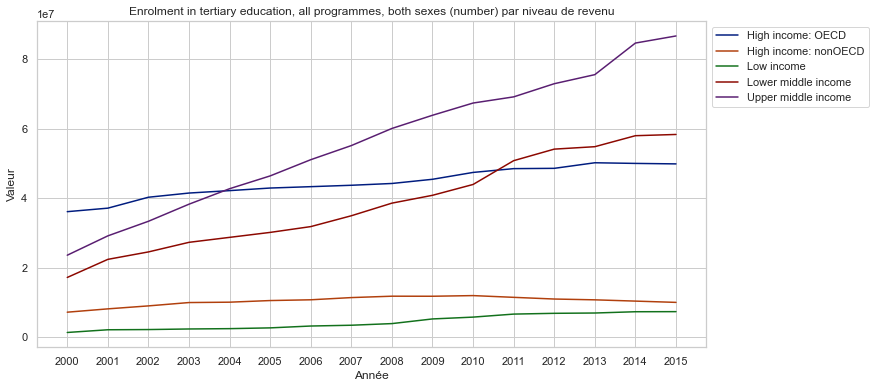

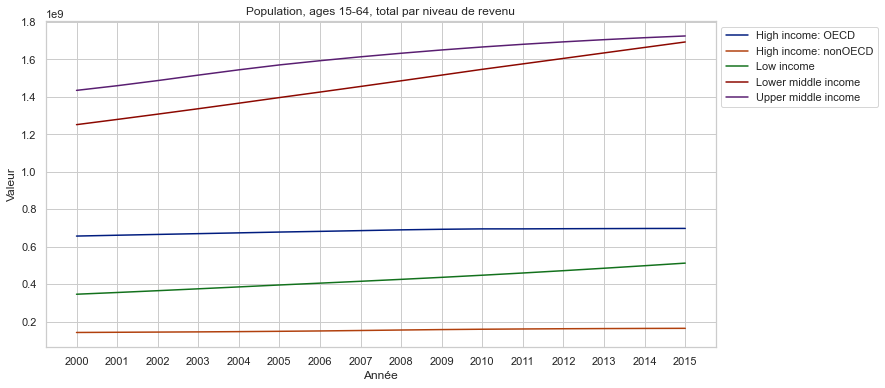

In [53]:
indicateurs = groupby_indicator_income.index.get_level_values('Indicator Name').unique()

#Rebelote
indicateurs_à_garder = ["Enrolment in secondary education, both sexes (number)",
                      "Enrolment in tertiary education, all programmes, both sexes (number)",
                      "Population, ages 15-64, total"]

#Un lineplot par indicateur à garder
for indicateur in indicateurs_à_garder:
    plt.figure(figsize=(12, 6))
    
    #Sélection des valeurs par indicateur
    valeurs_par_indicateur = groupby_indicator_income.loc[indicateur, :]

    for income in valeurs_par_indicateur.index.get_level_values('Income Group').unique():
        plt.plot(valeurs_par_indicateur.loc[income, :], label=income)

    plt.title(f"{indicateur} par niveau de revenu")
    plt.xlabel("Année")
    plt.ylabel("Valeur")
    plt.legend(bbox_to_anchor=[1,1])
    plt.show()

Moins de courbes, mais elles ressemblent étrangement à celles qu'on a obtenu précédemment toujours à cause de la présence de l'Inde et la Chine qui portent les groupes de niveau de revenu lower middle income et upper middle income.

In [54]:
#De nouveau la moyenne pour les 4 autres indicateurs
groupby_indicator_income2 = data_fill.groupby(['Indicator Name', 'Income Group'])[list(map(str, range(2000, 2016)))].mean()
groupby_indicator_income2

2000  \
Indicator Name                                     Income Group                      
Enrolment in secondary education, both sexes (n... High income: OECD     2710161.3   
                                                   High income: nonOECD   117110.3   
                                                   Low income            1062779.8   
                                                   Lower middle income   3546078.5   
                                                   Upper middle income   3535115.5   
Enrolment in tertiary education, all programmes... High income: OECD     1203276.7   
                                                   High income: nonOECD   478936.7   
                                                   Low income              67448.0   
                                                   Lower middle income    636057.9   
                                                   Upper middle income    812888.1   
Government expenditure in secondary institution... High income: OECD           1.9   
                                                   High income: nonOECD        1.8   
                                                   Low income                  0.7   
                                                   Lower middle income         1.4   
                                                   Upper middle income         1.6   
Government expenditure in tertiary institutions... High income: OECD           0.9   
                                                   High income: nonOECD        0.6   
                                                   Low income                  0.5   
                                                   Lower middle income         0.6   
                                                   Upper middle income         0.9   
Internet users (per 100 people)                    High income: OECD          29.6   
                                                   High income: nonOECD       14.2   
                                                   Low income                  0.2   
                                                   Lower middle income         1.0   
                                                   Upper middle income         3.6   
Personal computers (per 100 people)                High income: OECD          31.9   
                                                   High income: nonOECD       17.6   
                                                   Low income                  0.4   
                                                   Lower middle income         1.4   
                                                   Upper middle income         5.4   
Population, ages 15-64, total                      High income: OECD    21198438.5   
                                                   High income: nonOECD  5273432.9   
                                                   Low income           10194432.8   
                                                   Lower middle income  26084504.4   
                                                   Upper middle income  28701062.5   

                                                                              2001  \
Indicator Name                                     Income Group                      
Enrolment in secondary education, both sexes (n... High income: OECD     2719000.7   
                                                   High income: nonOECD   131771.8   
                                                   Low income             936713.5   
                                                   Lower middle income   3357752.7   
                                                   Upper middle income   3546900.3   
Enrolment in tertiary education, all programmes... High income: OECD     1236968.0   
                                                   High income: nonOECD   478834.2   
                                                   Low income              96690.1   
                                   

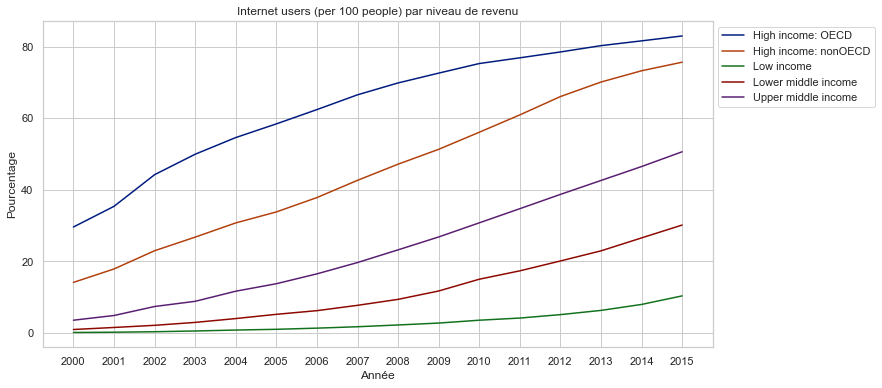

In [55]:
#Couverture internet
indicateur_à_garder = "Internet users (per 100 people)"

plt.figure(figsize=(12, 6))

#Sélection des valeurs par indicateur
valeurs_par_indicateur = groupby_indicator_income2.loc[indicateur_à_garder, :]

for income in valeurs_par_indicateur.index.get_level_values('Income Group').unique():
    plt.plot(valeurs_par_indicateur.loc[income, :], label=income)

plt.title(f"{indicateur_à_garder} par niveau de revenu")
plt.xlabel("Année")
plt.ylabel("Pourcentage")
plt.legend(bbox_to_anchor=[1,1])
plt.show()

Sans trop de surprise, plus le niveau de revenu est élevé, meilleure est la couverture internet.

Tendance globalement largement à la hausse.

In [56]:
#Dépenses gouvernementales
groupby_indicator_income3 = groupby_indicator_income2.drop(columns=['2014','2015'])
groupby_indicator_income3

2000  \
Indicator Name                                     Income Group                      
Enrolment in secondary education, both sexes (n... High income: OECD     2710161.3   
                                                   High income: nonOECD   117110.3   
                                                   Low income            1062779.8   
                                                   Lower middle income   3546078.5   
                                                   Upper middle income   3535115.5   
Enrolment in tertiary education, all programmes... High income: OECD     1203276.7   
                                                   High income: nonOECD   478936.7   
                                                   Low income              67448.0   
                                                   Lower middle income    636057.9   
                                                   Upper middle income    812888.1   
Government expenditure in secondary institution... High income: OECD           1.9   
                                                   High income: nonOECD        1.8   
                                                   Low income                  0.7   
                                                   Lower middle income         1.4   
                                                   Upper middle income         1.6   
Government expenditure in tertiary institutions... High income: OECD           0.9   
                                                   High income: nonOECD        0.6   
                                                   Low income                  0.5   
                                                   Lower middle income         0.6   
                                                   Upper middle income         0.9   
Internet users (per 100 people)                    High income: OECD          29.6   
                                                   High income: nonOECD       14.2   
                                                   Low income                  0.2   
                                                   Lower middle income         1.0   
                                                   Upper middle income         3.6   
Personal computers (per 100 people)                High income: OECD          31.9   
                                                   High income: nonOECD       17.6   
                                                   Low income                  0.4   
                                                   Lower middle income         1.4   
                                                   Upper middle income         5.4   
Population, ages 15-64, total                      High income: OECD    21198438.5   
                                                   High income: nonOECD  5273432.9   
                                                   Low income           10194432.8   
                                                   Lower middle income  26084504.4   
                                                   Upper middle income  28701062.5   

                                                                              2001  \
Indicator Name                                     Income Group                      
Enrolment in secondary education, both sexes (n... High income: OECD     2719000.7   
                                                   High income: nonOECD   131771.8   
                                                   Low income             936713.5   
                                                   Lower middle income   3357752.7   
                                                   Upper middle income   3546900.3   
Enrolment in tertiary education, all programmes... High income: OECD     1236968.0   
                                                   High income: nonOECD   478834.2   
                                                   Low income              96690.1   
                                   

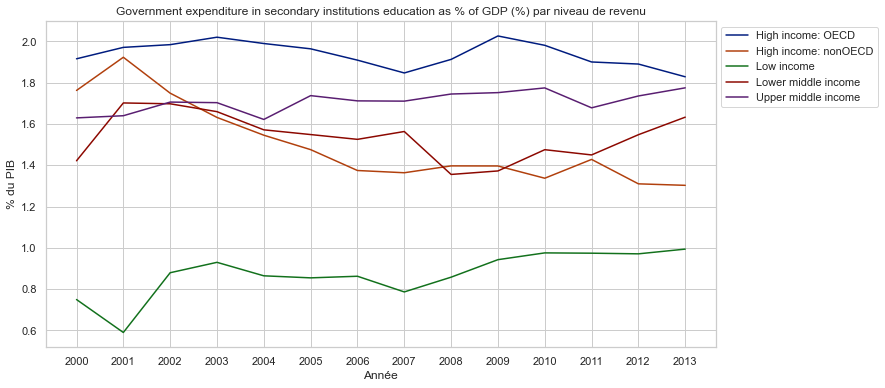

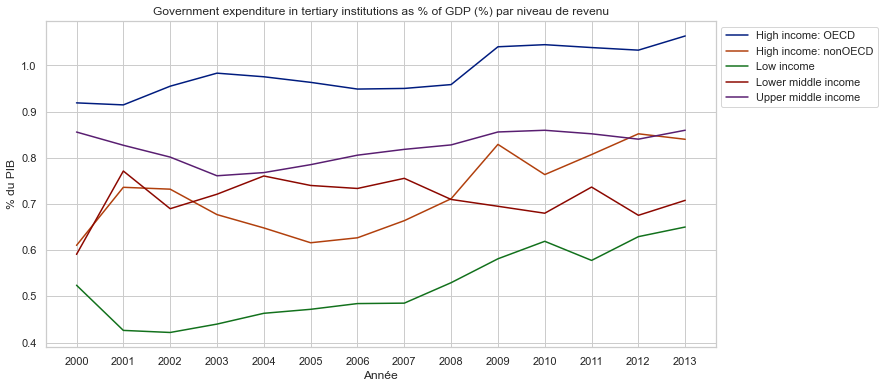

In [57]:
indicateurs_à_garder = ["Government expenditure in secondary institutions education as % of GDP (%)",
                       "Government expenditure in tertiary institutions as % of GDP (%)"]

for indicateur in indicateurs_à_garder:
    plt.figure(figsize=(12, 6))

    #Sélection des valeurs par indicateur
    valeurs_par_indicateur = groupby_indicator_income3.loc[indicateur, :]

    for income in valeurs_par_indicateur.index.get_level_values('Income Group').unique():
        plt.plot(valeurs_par_indicateur.loc[income, :], label=income)

    plt.title(f"{indicateur} par niveau de revenu")
    plt.xlabel("Année")
    plt.ylabel("% du PIB")
    plt.legend(bbox_to_anchor=[1,1])
    plt.show()

Les pays du groupe High income: OECD se situent en pôle position dans le secondaire et plus nettement encore dans l'enseignement supérieur. Les pays à faible niveau de revenu sont derniers sur les deux fronts, tandis que les pays du groupe High income: nonOECD se situent plutôt en milieu de tableau.

In [58]:
#PC
groupby_indicator_income4 = groupby_indicator_income3.drop(columns=list(map(str, range(2006, 2014))))
groupby_indicator_income4

2000  \
Indicator Name                                     Income Group                      
Enrolment in secondary education, both sexes (n... High income: OECD     2710161.3   
                                                   High income: nonOECD   117110.3   
                                                   Low income            1062779.8   
                                                   Lower middle income   3546078.5   
                                                   Upper middle income   3535115.5   
Enrolment in tertiary education, all programmes... High income: OECD     1203276.7   
                                                   High income: nonOECD   478936.7   
                                                   Low income              67448.0   
                                                   Lower middle income    636057.9   
                                                   Upper middle income    812888.1   
Government expenditure in secondary institution... High income: OECD           1.9   
                                                   High income: nonOECD        1.8   
                                                   Low income                  0.7   
                                                   Lower middle income         1.4   
                                                   Upper middle income         1.6   
Government expenditure in tertiary institutions... High income: OECD           0.9   
                                                   High income: nonOECD        0.6   
                                                   Low income                  0.5   
                                                   Lower middle income         0.6   
                                                   Upper middle income         0.9   
Internet users (per 100 people)                    High income: OECD          29.6   
                                                   High income: nonOECD       14.2   
                                                   Low income                  0.2   
                                                   Lower middle income         1.0   
                                                   Upper middle income         3.6   
Personal computers (per 100 people)                High income: OECD          31.9   
                                                   High income: nonOECD       17.6   
                                                   Low income                  0.4   
                                                   Lower middle income         1.4   
                                                   Upper middle income         5.4   
Population, ages 15-64, total                      High income: OECD    21198438.5   
                                                   High income: nonOECD  5273432.9   
                                                   Low income           10194432.8   
                                                   Lower middle income  26084504.4   
                                                   Upper middle income  28701062.5   

                                                                              2001  \
Indicator Name                                     Income Group                      
Enrolment in secondary education, both sexes (n... High income: OECD     2719000.7   
                                                   High income: nonOECD   131771.8   
                                                   Low income             936713.5   
                                                   Lower middle income   3357752.7   
                                                   Upper middle income   3546900.3   
Enrolment in tertiary education, all programmes... High income: OECD     1236968.0   
                                                   High income: nonOECD   478834.2   
                                                   Low income              96690.1   
                                   

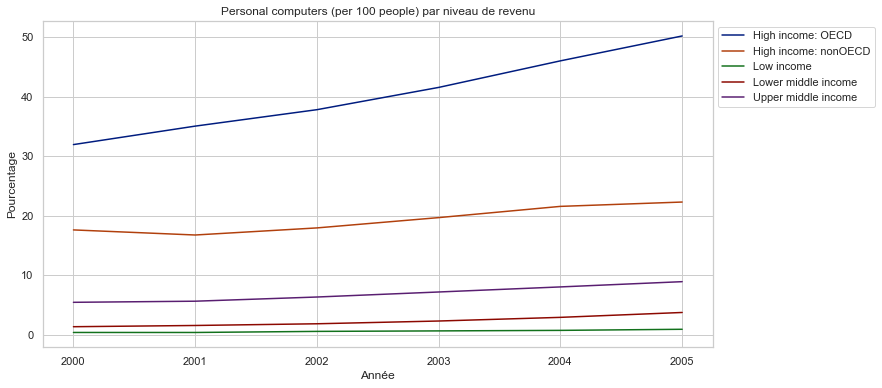

In [59]:
indicateur_à_garder = "Personal computers (per 100 people)"

plt.figure(figsize=(12, 6))

#Sélection des valeurs par indicateur
valeurs_par_indicateur = groupby_indicator_income4.loc[indicateur_à_garder, :]

for income in valeurs_par_indicateur.index.get_level_values('Income Group').unique():
    plt.plot(valeurs_par_indicateur.loc[income, :], label=income)

plt.title(f"{indicateur_à_garder} par niveau de revenu")
plt.xlabel("Année")
plt.ylabel("Pourcentage")
plt.legend(bbox_to_anchor=[1,1])
plt.show()

Comme pour la couverture internet, plus le niveau de revenu est élevé, plus les gens sont équipés.

Tendance globalement à la hausse.

Ce qui ressort de ces pré-analyses par groupements de pays est qu'il semble plus pertinent de s'intéresser aux pays en terme de niveau de revenu qu'en terme de localisation géographique.

Cependant, à titre d'exemple et pour reprendre le dernier plot qu'on a sous les yeux, si 10% des 15-64 ans issus du groupe Upper middle income est équipé d'un PC (1.7 milliard de personnes en 2015, soit 170 millions de personnes), cela correspond toujours à plus d'individus que 25% des 15-64 ans issus du groupe High income: nonOECD (200 millions de personnes en 2015, soit 50 millions de personnes). Cela sans compter sur le fait que nos données concernant les PC ont plus de 15 ans de retard. Hypothétiquement, même une hausse de seulement 1% sur une population de près de 2 milliards ferait une énorme différence.

Pour cette raison, même si on décide de s'intéresser en priorité au niveau de revenu, il me semble qu'il serait judicieux de garder un oeil au moins sur la Chine et l'Inde.
## 3) Par pays <a class="anchor" id="iii3"></a>

In [60]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [61]:
#Pour la visualisation par pays, on va faire des maps
import plotly.express as px

In [62]:
#Comme on a utilisé ffill sur l'ensemble de nos données, on peut se contenter de la colonne 2015
#Toutes nos données ne seront pas de 2015, mais ça nous évitera des manipulations supplémentaires
data_2015 = data_fill.drop(columns=list(map(str, range(2000, 2015))))
data_2015

Country Name Country Code              Region Income Group  \
0     Afghanistan          AFG          South Asia   Low income   
1     Afghanistan          AFG          South Asia   Low income   
2     Afghanistan          AFG          South Asia   Low income   
3     Afghanistan          AFG          South Asia   Low income   
4     Afghanistan          AFG          South Asia   Low income   
...           ...          ...                 ...          ...   
1381     Zimbabwe          ZWE  Sub-Saharan Africa   Low income   
1382     Zimbabwe          ZWE  Sub-Saharan Africa   Low income   
1383     Zimbabwe          ZWE  Sub-Saharan Africa   Low income   
1384     Zimbabwe          ZWE  Sub-Saharan Africa   Low income   
1385     Zimbabwe          ZWE  Sub-Saharan Africa   Low income   

                                         Indicator Name  \
0     Enrolment in secondary education, both sexes (...   
1     Enrolment in tertiary education, all programme...   
2     Government expenditure in secondary institutio...   
3     Government expenditure in tertiary institution...   
4                       Internet users (per 100 people)   
...                                                 ...   
1381  Government expenditure in secondary institutio...   
1382  Government expenditure in tertiary institution...   
1383                    Internet users (per 100 people)   
1384                Personal computers (per 100 people)   
1385                      Population, ages 15-64, total   

                   Indicator Code      2015  
0                     SE.SEC.ENRL 2698816.0  
1                     SE.TER.ENRL  262874.0  
2     XGDP.23.FSGOV.FDINSTADM.FFD       NaN  
3     XGDP.56.FSGOV.FDINSTADM.FFD       NaN  
4                  IT.NET.USER.P2       8.3  
...                           ...       ...  
1381  XGDP.23.FSGOV.FDINSTADM.FFD       0.5  
1382  XGDP.56.FSGOV.FDINSTADM.FFD       0.4  
1383               IT.NET.USER.P2      22.7  
1384               IT.CMP.PCMP.P2       7.4  
1385               SP.POP.1564.TO 8788963.0  

[1386 rows x 7 columns]

In [63]:
pip install jupyter

Note: you may need to restart the kernel to use updated packages.


In [64]:
#L'installation ci-dessus fait suite à un message d'erreur causé par cette cellule
#Plotly associe les codes ISO-3 à des emplacemetns géographiques, donc notre colonne Country Code est parfaite pour l'occasion
indicateurs = data_2015["Indicator Name"].unique()
#Comme on utilise color_continuous_scale, on ne peut pas garder les mêmes couleurs que tout à l'heure
couleurs = ['reds', 'greens', 'blues', 'purp', 'oranges', 'pinkyl', 'tealgrn']
#Valeurs max pour les légendes
maxi = [20000000, 6000000, 3, 2.5, 90, 80, 100000000]

#On créé une boucle pour avoir une carte et une couleur par indicateur
for indicateur, couleur, maxi in zip(indicateurs, couleurs, maxi):
    carte = px.choropleth(
        data_2015[data_2015["Indicator Name"] == indicateur],
        locations="Country Code",
        color="2015",
        hover_name="Country Name",
        projection="natural earth",
        title=f"{indicateur}",
        color_continuous_scale=couleur,
        height=600,
        range_color=(0, maxi))
    
    carte.show()

    #On profite de la boucle pour également afficher le top 15 des pays par indicateur après chaque map
    sorted_data = data_2015[data_2015["Indicator Name"] == indicateur].sort_values(by="2015", ascending=False).reset_index()
    print(f"Top 15 des pays pour {indicateur}:")
    print(sorted_data[["Country Name", "2015"]].head(15))
    print("="*100)  #Pour faire joli et organisé

Top 15 des pays pour Enrolment in secondary education, both sexes (number):
          Country Name        2015
0                India 129542056.0
1                China  86127200.0
2        United States  24229776.0
3            Indonesia  23756316.0
4               Brazil  23501784.0
5           Bangladesh  14566771.0
6               Mexico  12993322.0
7              Nigeria  12532753.0
8             Pakistan  12077917.0
9               Turkey  10969178.0
10  Russian Federation   9384610.0
11    Egypt, Arab Rep.   8208329.0
12               Japan   7227485.0
13         Philippines   7220389.0
14             Germany   7112949.5


Top 15 des pays pour Enrolment in tertiary education, all programmes, both sexes (number):
          Country Name       2015
0                China 43367392.0
1                India 32107420.0
2        United States 19531728.0
3               Brazil  8285475.0
4   Russian Federation  6592416.0
5               Turkey  6062886.0
6            Indonesia  5107999.0
7   Iran, Islamic Rep.  4802721.0
8                Japan  3862460.0
9          Philippines  3563396.0
10              Mexico  3419391.0
11         Korea, Rep.  3268099.0
12             Germany  2977781.0
13           Argentina  2869450.0
14    Egypt, Arab Rep.  2868912.0


Top 15 des pays pour Government expenditure in secondary institutions education as % of GDP (%):
        Country Name  2015
0           Dominica   5.1
1               Cuba   3.7
2    Kyrgyz Republic   3.7
3        Congo, Rep.   3.3
4             Bhutan   3.3
5   Marshall Islands   3.2
6           Botswana   3.1
7          Mauritius   3.0
8            Tunisia   3.0
9              Ghana   2.9
10             Malta   2.9
11            Cyprus   2.8
12           Vietnam   2.7
13           Belgium   2.6
14         Swaziland   2.6


Top 15 des pays pour Government expenditure in tertiary institutions as % of GDP (%):
     Country Name  2015
0            Cuba   3.0
1        Barbados   2.6
2         Ukraine   2.1
3        Ethiopia   1.9
4         Bolivia   1.8
5         Finland   1.7
6         Denmark   1.7
7         Austria   1.7
8         Tunisia   1.6
9         Lesotho   1.5
10     Costa Rica   1.5
11    Puerto Rico   1.5
12  Venezuela, RB   1.5
13         Malawi   1.5
14         Sweden   1.5


Top 15 des pays pour Internet users (per 100 people):
            Country Name  2015
0                Bermuda  98.3
1                Iceland  98.2
2             Luxembourg  97.3
3                Andorra  96.9
4                 Norway  96.8
5          Liechtenstein  96.6
6                Denmark  96.3
7                Bahrain  93.5
8                 Monaco  93.4
9                  Qatar  92.9
10        United Kingdom  92.0
11           Netherlands  91.7
12                 Japan  91.1
13                Sweden  90.6
14  United Arab Emirates  90.5


Top 15 des pays pour Personal computers (per 100 people):
            Country Name  2015
0            Switzerland  96.2
1                 Canada  94.4
2            Netherlands  91.0
3                 Sweden  88.0
4             San Marino  80.6
5         United Kingdom  80.2
6          United States  79.9
7              Singapore  72.1
8   Hong Kong SAR, China  69.4
9             Luxembourg  68.2
10          Saudi Arabia  65.2
11                France  64.7
12               Germany  64.5
13                Norway  62.8
14               Austria  60.6


Top 15 des pays pour Population, ages 15-64, total:
          Country Name        2015
0                China 996030376.0
1                India 860127604.0
2        United States 212262832.0
3            Indonesia 173087947.0
4               Brazil 143204007.0
5             Pakistan 114567162.0
6           Bangladesh 105651107.0
7   Russian Federation 100404879.0
8              Nigeria  96295997.0
9               Mexico  83145725.0
10               Japan  77547638.0
11             Vietnam  64347640.0
12         Philippines  64283627.0
13    Egypt, Arab Rep.  57954831.0
14  Iran, Islamic Rep.  56610426.0


# Conclusion <a class="anchor" id="conclusion"></a>
Malgré le nombre important de valeurs manquantes dans le jeu de données, il est largement capable d'informer les décisions d'ouverture vers de nouveaux pays. Au premier abord, il semble que les pays high income OECD ou non soient à privilégier, sans ignorer pour autant les pays à très forte population des autres groupes.

Naturellement, il conviendrait de mener une étude plus poussée, et sans doute de revoir la sélection des indicateurs pour affiner la recherche. En guise d'exemple, les indicateurs concernant les dépenses gouvernementales mettent en valeur des pays relativement petits ou pauvres, qui ne brillent pas nécessairement sur les autres indicateurs. Considérer un indicateur GDP per capita serait certainement judicieux.

Enfin, la méthode ffill me semblait adaptée afin d'apporter une solution rapide aux valeurs manquantes, mais il faudrait envisager d'autres méthodes si on désirait mener des études plus précises sur ce jeu de donnée.